# Анализ продаж электронных игр  и подготовка стратегии магазина "Стримчик" на следующий год

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наличии данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогназируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Анализ-и-описание-пропусков" data-toc-modified-id="Анализ-и-описание-пропусков-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Анализ и описание пропусков</a></span></li><li><span><a href="#Подытог" data-toc-modified-id="Подытог-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подытог</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подытог" data-toc-modified-id="Подытог-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подытог</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-продаж" data-toc-modified-id="Анализ-продаж-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ продаж</a></span></li><li><span><a href="#Актуальные-платформы" data-toc-modified-id="Актуальные-платформы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Актуальные платформы</a></span></li><li><span><a href="#Ящик-с-усами" data-toc-modified-id="Ящик-с-усами-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Ящик с усами</a></span></li><li><span><a href="#Влияние-отзывов-на-продажи" data-toc-modified-id="Влияние-отзывов-на-продажи-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Влияние отзывов на продажи</a></span></li><li><span><a href="#Проверка-гипотез-о-влиянии-оценок-критиков-и-пользователей" data-toc-modified-id="Проверка-гипотез-о-влиянии-оценок-критиков-и-пользователей-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка гипотез о влиянии оценок критиков и пользователей</a></span></li><li><span><a href="#Подытог" data-toc-modified-id="Подытог-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Подытог</a></span></li><li><span><a href="#Распределение-игр-по-жанрам." data-toc-modified-id="Распределение-игр-по-жанрам.-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Распределение игр по жанрам.</a></span></li></ul></li><li><span><a href="#Портрет-пользователей-по-регионам" data-toc-modified-id="Портрет-пользователей-по-регионам-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователей по регионам</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Подытог" data-toc-modified-id="Подытог-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Подытог</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import seaborn as sb

Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [2]:
try:
    df = pd.read_csv('C://datasets/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')
pd.set_option("max_colwidth", 150)
    
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

### Анализ и описание пропусков

- Всего 16715 строк.

- У 2 отсутствует название игры. Так же у 2х игр отсутствует жанр. 

- Везде присутствуют данные по продажам и платформа.

- В 269 случаях не указан год выпуска игры.

- Много пропусков в рейтингах. Вероятно, из-за года выхода. Вряд ли в 1984 году уже существовало рейтинговое агенство.

- Год - тип данных переделаем на int, User_Score так же переделаем на int.

In [3]:
df[df['Name'].isna()]

Name Platform  Year_of_Release Genre  NA_sales  EU_sales  JP_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       Other_sales  Critic_Score User_Score Rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

In [4]:
df[df['Year_of_Release'].isna()]

Name Platform  Year_of_Release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                       Virtua Quest       GC              NaN   

              Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   
377          Sports      0.59      2.36      0.04         0.51          84.0   
456          Action      1.80      0.97      0.00         0.29          74.0   
475        Fighting      1.57      1.02      0.00         0.41           NaN   
609         Shooter      2.36      0.14      0.00         0.03           NaN   
...             ...       ...       ...       ...          ...           ...   
16373        Sports      0.01      0.00      0.00         0.00          43.0   
16405        Racing      0.01      0.00      0.00         0.00          69.0   
16448       Shooter      0.01      0.00      0.00         0.00          59.0   
16458     Adventure      0.01      0.00      0.00         0.00           NaN   
16522  Role-Playing      0.01      0.00      0.00         0.00          55.0   

      User_Score Rating  
183          8.5      E  
377          6.4      E  
456          7.9   E10+  
475          NaN    NaN  
609          NaN    NaN  
...          ...    ...  
16373        tbd   E10+  
16405        6.5      T  
16448        6.7      M  
16458        NaN    NaN  
16522        5.5      T  

[269 rows x 11 columns]

<b>
На первый взгляд кажется, что можно взять год выхода игры из её название, а учитывая методику вписывать в название год следующий за годом выхода, возможно по такой формуле восстановить пропуски. Проверим.

In [5]:
z = df.dropna(subset = ['Name']) #убираем пропуски из названий для применения функций в дальнейшем
z = z[z[z['Name'].notna()]['Name'].str.contains('200').values] #выделим те игры, у которых в названии есть год
#циклом создадим два списка индексов: где год выхода отличается от года в названии на (-1) и где это правило не работает 
not_applyed_indexes = []
applyed_indexes = []

for index, value in z['Name'].items(): 
    try:
        temp = int(z.loc[index, 'Name'][-4:]) - int(z.loc[index, 'Year_of_Release'])
        #print(temp)
        if temp != 1:
            not_applyed_indexes.append(index)
        else:
            applyed_indexes.append(index)
    except:
        continue
#проверим у какого количества игр в названии год отличается более чем на единицу
print(f'Количество игр, где год выхода нельзя взять из названия = {len(not_applyed_indexes)/len(applyed_indexes+not_applyed_indexes):.1%}')

Количество игр, где год выхода нельзя взять из названия = 39.3%


In [6]:
df.loc[not_applyed_indexes]

Name Platform  Year_of_Release  \
769                         SimCity 2000       PC           1992.0   
926                            FIFA 2000       PS           1998.0   
1004                     Madden NFL 2000       PS           1998.0   
1217                   MVP Baseball 2005      PS2           2005.0   
1237                       NBA Live 2000       PS           1998.0   
...                                  ...      ...              ...   
16361  PDC World Championship Darts 2009      Wii           2009.0   
16521               ESPN NBA 2Night 2002       XB           2002.0   
16541                   G1 Jockey 4 2007      PS2           2007.0   
16622    World Snooker Championship 2007     X360           2007.0   
16676                   G1 Jockey 4 2008      PS3           2008.0   

            Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
769    Simulation      1.20      0.84      0.00         0.10           NaN   
926        Sports      0.22      1.47      0.04         0.14           NaN   
1004       Sports      1.68      0.04      0.00         0.04           NaN   
1217       Sports      1.26      0.07      0.00         0.21          87.0   
1237       Sports      1.43      0.05      0.00         0.03           NaN   
...           ...       ...       ...       ...          ...           ...   
16361      Sports      0.00      0.01      0.00         0.00           NaN   
16521      Sports      0.01      0.00      0.00         0.00           NaN   
16541      Sports      0.00      0.00      0.01         0.00           NaN   
16622      Sports      0.00      0.01      0.00         0.00           NaN   
16676      Sports      0.00      0.00      0.00         0.00           NaN   

      User_Score Rating  
769          NaN    NaN  
926          NaN    NaN  
1004         NaN    NaN  
1217         8.6      E  
1237         NaN    NaN  
...          ...    ...  
16361        NaN    NaN  
16521        tbd      E  
16541        NaN    NaN  
16622        NaN    NaN  
16676        NaN    NaN  

[163 rows x 11 columns]

- В 40 процентов случаев брать год выхода из названия по формуле будет неправильным. Год выхода отсутсвует у крайне малого значения игр, проще будет удалить эти значения.

In [7]:
del z

In [8]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

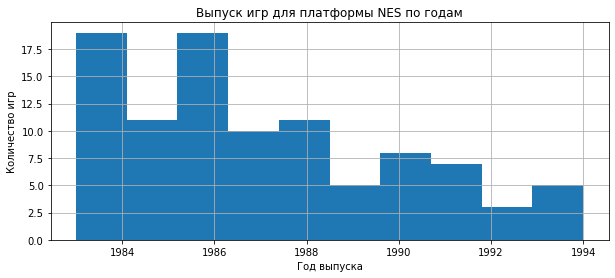

In [9]:
ax = df[df['Platform'] == 'NES' ]['Year_of_Release'].hist(figsize = (10,4))
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
ax.set_title('Выпуск игр для платформы NES по годам',fontsize=12)
None

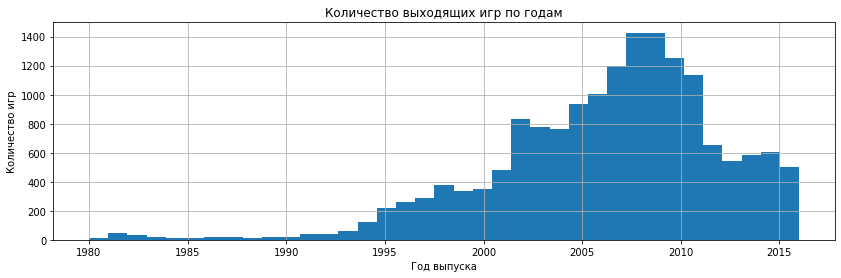

In [10]:
ax = df['Year_of_Release'].hist(bins = 37, figsize = (14,4))
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
ax.set_title('Количество выходящих игр по годам',fontsize=12)
None

In [11]:
df.duplicated().describe()

count     16715
unique        1
top       False
freq      16715
dtype: object

In [12]:
df['Name'].value_counts().head(15)

Need for Speed: Most Wanted                12
LEGO Marvel Super Heroes                    9
FIFA 14                                     9
Madden NFL 07                               9
Ratatouille                                 9
Cars                                        8
LEGO The Hobbit                             8
FIFA Soccer 13                              8
LEGO Jurassic World                         8
Monopoly                                    8
The LEGO Movie Videogame                    8
LEGO Harry Potter: Years 5-7                8
Madden NFL 08                               8
Terraria                                    8
LEGO Star Wars II: The Original Trilogy     8
Name: Name, dtype: int64

In [13]:
df.query('Name == "Need for Speed: Most Wanted"').sort_values(by = 'Year_of_Release')

Name Platform  Year_of_Release   Genre  \
253    Need for Speed: Most Wanted      PS2           2005.0  Racing   
1591   Need for Speed: Most Wanted     X360           2005.0  Racing   
1998   Need for Speed: Most Wanted       XB           2005.0  Racing   
3581   Need for Speed: Most Wanted       GC           2005.0  Racing   
5972   Need for Speed: Most Wanted       PC           2005.0  Racing   
6410   Need for Speed: Most Wanted       DS           2005.0  Racing   
6473   Need for Speed: Most Wanted      GBA           2005.0  Racing   
523    Need for Speed: Most Wanted      PS3           2012.0  Racing   
1190   Need for Speed: Most Wanted     X360           2012.0  Racing   
2048   Need for Speed: Most Wanted      PSV           2012.0  Racing   
11715  Need for Speed: Most Wanted       PC           2012.0  Racing   
6273   Need for Speed: Most Wanted     WiiU           2013.0  Racing   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
253        2.03      1.79      0.08         0.47          82.0        9.1   
1591       1.00      0.13      0.02         0.10          83.0        8.5   
1998       0.53      0.46      0.00         0.05          83.0        8.8   
3581       0.43      0.11      0.00         0.02          80.0        9.1   
5972       0.02      0.23      0.00         0.04          82.0        8.5   
6410       0.24      0.01      0.00         0.02          45.0        6.1   
6473       0.19      0.07      0.00         0.00           NaN        8.3   
523        0.71      1.46      0.06         0.58           NaN        NaN   
1190       0.62      0.78      0.01         0.15          83.0        8.5   
2048       0.33      0.45      0.01         0.22           NaN        NaN   
11715      0.00      0.06      0.00         0.02          82.0        8.5   
6273       0.13      0.12      0.00         0.02           NaN        NaN   

      Rating  
253        T  
1591       T  
1998       T  
3581       T  
5972       T  
6410       E  
6473       E  
523      NaN  
1190       T  
2048     NaN  
11715      T  
6273     NaN

In [14]:
count_lego = 0
count_fifa = 0
for x in df['Name']:
    try:
        if "LEGO" in x:
            count_lego +=1
        if 'FIFA' in x:
            count_fifa +=1
    except:
            continue
print(f'Выпущено {count_lego} LEGO и {count_fifa} FIFA игр')

Выпущено 149 LEGO и 142 FIFA игр


In [15]:
df[df['Name'].str.contains('jp sale')|df['Name'].str.contains('JP sale')]

Name Platform  \
4076         Yu-Gi-Oh! Forbidden Memories (JP sales)       PS   
4135                        The Godfather (JP sales)      PS2   
4731   Yu-Gi-Oh! The Eternal Duelist Soul (JP sales)      GBA   
4781                    Warriors Orochi 2 (JP sales)      PS2   
5217             Naruto: Ultimate Ninja 3 (JP sales)      PS2   
...                                              ...      ...   
16426                     Rondo of Swords (jp sales)       DS   
16506                       The Godfather (JP sales)     X360   
16616           National Geographic Panda (JP sales)       DS   
16656               Imagine Figure Skater (JP sales)       DS   
16685          Help Wanted: 50 Wacky Jobs (jp sales)      Wii   

       Year_of_Release         Genre  NA_sales  EU_sales  JP_sales  \
4076            1999.0  Role-Playing      0.00      0.00      0.45   
4135            2006.0        Action      0.39      0.02      0.00   
4731            2001.0          Misc      0.00      0.00      0.40   
4781            2008.0        Action      0.00      0.00      0.40   
5217            2005.0      Fighting      0.00      0.00      0.36   
...                ...           ...       ...       ...       ...   
16426           2007.0  Role-Playing      0.00      0.00      0.01   
16506           2006.0        Action      0.00      0.00      0.01   
16616           2008.0    Simulation      0.00      0.00      0.01   
16656           2007.0        Sports      0.00      0.00      0.01   
16685           2008.0    Simulation      0.00      0.00      0.01   

       Other_sales  Critic_Score User_Score Rating  
4076          0.03           NaN        NaN    NaN  
4135          0.06           NaN        NaN    NaN  
4731          0.01           NaN        NaN    NaN  
4781          0.00           NaN        NaN    NaN  
5217          0.00           NaN        NaN    NaN  
...            ...           ...        ...    ...  
16426         0.00           NaN        NaN    NaN  
16506         0.00           NaN        NaN    NaN  
16616         0.00           NaN        NaN    NaN  
16656         0.00           NaN        NaN    NaN  
16685         0.00           NaN        NaN    NaN  

[87 rows x 11 columns]

- Дубликатов в названии платформ нет;
- В списке присутсвуют данные по продажам для консолей, которые более не выпускаются;
- Больше всего игр выпускалось в 2008-2009 годах;
- Датасет содержит данные об играх с 1980 года по 2016;
- Дубликаты отсутствуют;
- Некоторые игры выходили множество раз на разных платформах;
- Выпущено 149 LEGO и 142 FIFA игр  
<b>Далее:</b>  
- Удалим из датасета игры, для которых отсутствует даже название;
- Иногда в названиях содержатся указания, что данная версия продавалась только в определенном регионе. Поскольку мы будем искать сумарные продажи, а объем таких строк невелик - их стоит оставить;
- Продолжим анализ пропущенных значений.

In [16]:
df = df.dropna(subset=['Name'], inplace=False)

In [17]:
df[df['Name'].str.contains('\(')]

Name  \
87                                       Star Wars Battlefront (2015)   
342                                      Star Wars Battlefront (2015)   
416                                                Gran Turismo (PSP)   
603                         Ghostbusters: The Video Game (DS Version)   
639                                             Need for Speed (2015)   
...                                                               ...   
16602  Transformers: War for Cybertron (XBox 360, PS3, & PC Versions)   
16616                            National Geographic Panda (JP sales)   
16631                                 The Amazing Spider-Man 2 (2014)   
16656                                Imagine Figure Skater (JP sales)   
16685                           Help Wanted: 50 Wacky Jobs (jp sales)   

      Platform  Year_of_Release       Genre  NA_sales  EU_sales  JP_sales  \
87         PS4           2015.0     Shooter      2.99      3.49      0.22   
342       XOne           2015.0     Shooter      2.04      1.28      0.02   
416        PSP           2009.0      Racing      0.50      1.58      0.31   
603       X360           2009.0      Action      1.04      1.22      0.03   
639        PS4           2015.0      Racing      0.50      1.50      0.05   
...        ...              ...         ...       ...       ...       ...   
16602       PC           2010.0     Shooter      0.01      0.00      0.00   
16616       DS           2008.0  Simulation      0.00      0.00      0.01   
16631       PC           2014.0      Action      0.00      0.01      0.00   
16656       DS           2007.0      Sports      0.00      0.00      0.01   
16685      Wii           2008.0  Simulation      0.00      0.00      0.01   

       Other_sales  Critic_Score User_Score Rating  
87            1.28           NaN        NaN    NaN  
342           0.32           NaN        NaN    NaN  
416           0.87           NaN        NaN    NaN  
603           0.27           NaN        NaN    NaN  
639           0.37           NaN        NaN    NaN  
...            ...           ...        ...    ...  
16602         0.00           NaN        NaN    NaN  
16616         0.00           NaN        NaN    NaN  
16631         0.00           NaN        NaN    NaN  
16656         0.00           NaN        NaN    NaN  
16685         0.00           NaN        NaN    NaN  

[279 rows x 11 columns]

In [18]:
df

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16713 rows x 11 columns]

- Есть почти 280 строк, где в названиях игр присутствуют уточнения, комментарии и прочая информация. Например "DS Version", но для платформы X360 или объедененные продажи на всех платформах, но в категории PC. Перебирать их вручную не имеет смысла, но данные по продажам стоит всё же учитывать в общей статистике

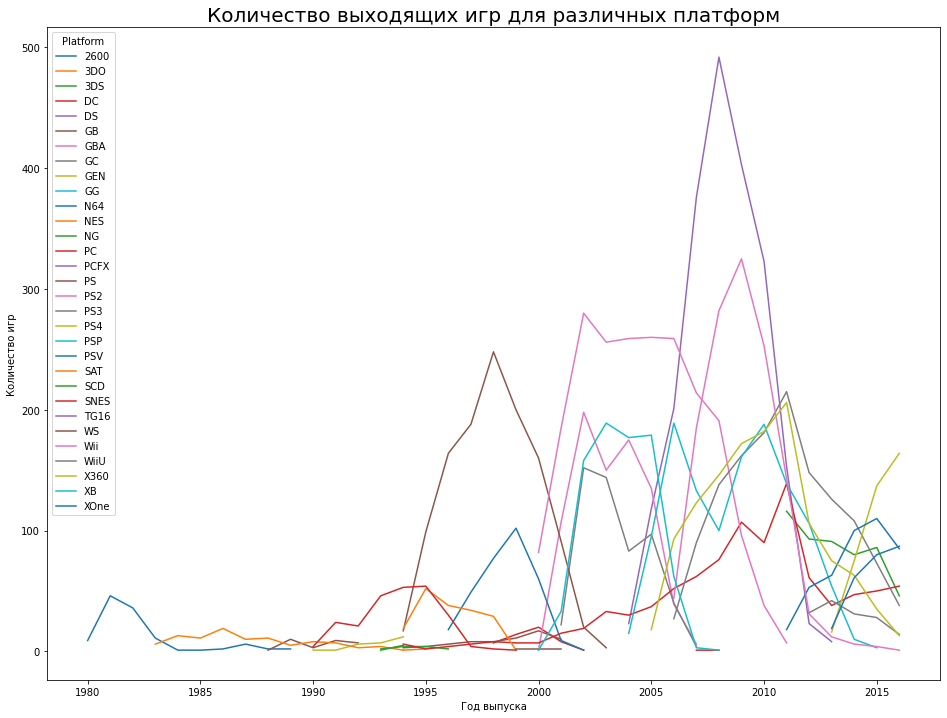

In [19]:
#games_by_platform_by_year = df.pivot_table(
#    index = 'Year_of_Release',  columns = 'Platform', values = 'Name', aggfunc = 'count')
games_by_platform_by_year = df.groupby(by='Platform')['Year_of_Release'].value_counts().unstack(level=0)
ax = games_by_platform_by_year.plot(figsize = (16,12), legend = True)
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
ax.set_title('Количество выходящих игр для различных платформ',fontsize=20)
None

In [20]:
#красивый интерактивный график, который не отображается на GitHub
import plotly.express as px
import numpy as np
import pandas as pd
import math

fig = px.line(games_by_platform_by_year, 
              title='Количество выходящих игр для различных платформ')
fig.update_layout(width=950, height=800)
fig.show()

- Видно, что платформы в основном переживают единичный пик популярности, после чего количество игр снижается, хотя есть исключения, например PSP. Однако там выходила обновленная версия консоли, но тут её нет, они объеденены

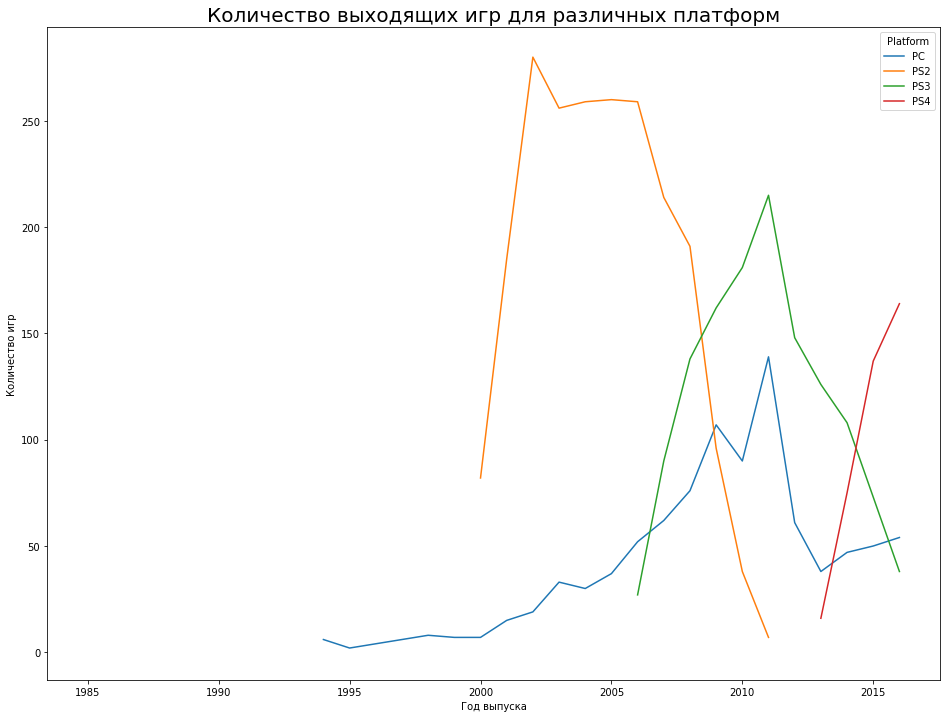

In [21]:
ax = games_by_platform_by_year[['PC','PS2','PS3','PS4']].plot(figsize = (16,12), legend = True)
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
ax.set_title('Количество выходящих игр для различных платформ',fontsize=20)
None

- Консоли сменяют друг друга, а выход игр для персональных компьютеров обвалился после 2011 года.

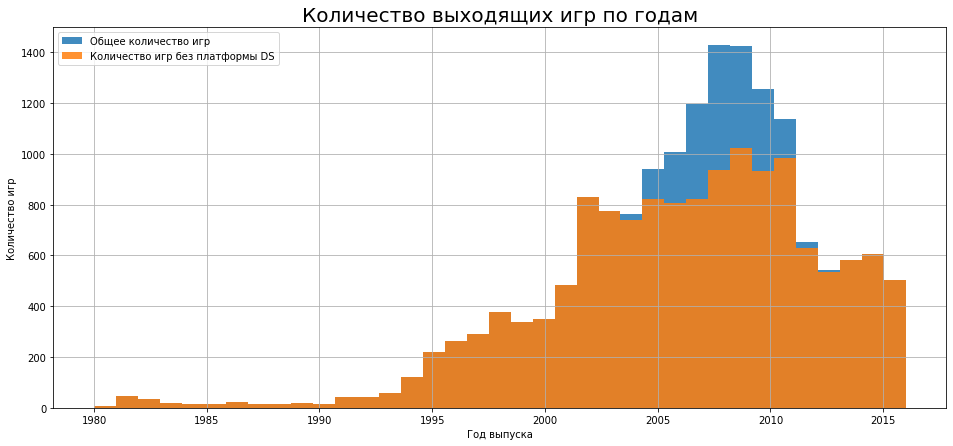

In [22]:
ax = df['Year_of_Release'].hist(bins = 37, alpha = 0.85, figsize = (16,7), legend = True)
bx = df.query('Platform != "DS"')['Year_of_Release'].hist(bins = 37, alpha = 0.85, legend = True)
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
ax.set_title('Количество выходящих игр по годам',fontsize=20)
ax.legend(['Общее количество игр', 'Количество игр без платформы DS'])
None

- Значительный приток игр в 2008-2009 годах принесла одна платформа (DS)

In [23]:
for x in range(1980, 2017):
    print("Топ-3 платформ по количеству игр в ", x, "году :")
    display(df.query('Year_of_Release == @x')['Platform'].value_counts().head(3))

Топ-3 платформ по количеству игр в  1980 году :


2600    9
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1981 году :


2600    46
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1982 году :


2600    36
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1983 году :


2600    11
NES      6
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1984 году :


NES     13
2600     1
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1985 году :


NES    11
DS      1
PC      1
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1986 году :


NES     19
2600     2
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1987 году :


NES     10
2600     6
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1988 году :


NES     11
2600     2
GB       1
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1989 году :


GB      10
NES      5
2600     2
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1990 году :


NES     8
SNES    4
GB      3
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1991 году :


SNES    24
GB       9
NES      7
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1992 году :


SNES    21
GB       7
GEN      6
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1993 году :


SNES    46
GEN      7
NES      4
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1994 году :


SNES    53
SAT     19
PS      17
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1995 году :


PS      99
SNES    54
SAT     52
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1996 году :


PS      164
SAT      38
SNES     30
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1997 году :


PS     188
N64     49
SAT     34
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1998 году :


PS     248
N64     77
SAT     29
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  1999 году :


PS     200
N64    102
DC      14
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2000 году :


PS     160
PS2     82
N64     60
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2001 году :


PS2    185
GBA    107
PS      91
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2002 году :


PS2    280
GBA    198
XB     158
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2003 году :


PS2    256
XB     189
GBA    150
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2004 году :


PS2    259
XB     177
GBA    175
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2005 году :


PS2    260
XB     179
GBA    135
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2006 году :


PS2    259
DS     201
PSP    189
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2007 году :


DS     376
PS2    214
Wii    185
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2008 году :


DS     492
Wii    282
PS2    191
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2009 году :


DS      403
Wii     325
X360    172
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2010 году :


DS     323
Wii    253
PSP    188
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2011 году :


PS3     215
X360    206
DS      153
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2012 году :


PS3     148
X360    106
PSP     106
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2013 году :


PS3     126
3DS      91
X360     75
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2014 году :


PS3    108
PSV    100
3DS     80
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2015 году :


PS4    137
PSV    110
3DS     86
Name: Platform, dtype: int64

Топ-3 платформ по количеству игр в  2016 году :


PS4     164
XOne     87
PSV      85
Name: Platform, dtype: int64

- Самые популярыне игровые платформы каждые пару лет сменяются

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: years_of_living, dtype: float64

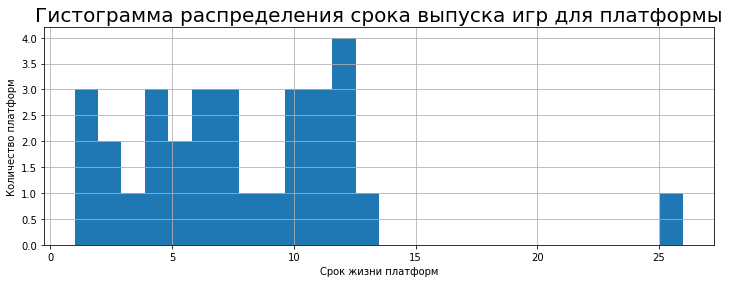

In [24]:
platform_count = games_by_platform_by_year.T.pivot_table(
    index = 'Platform',  aggfunc = 'count')
platform_count['years_of_living'] = platform_count.sum(axis = 1)
platform_years_of_live = platform_count['years_of_living']
ax = platform_years_of_live.hist(bins = 26, figsize = (12,4))
ax.set_xlabel('Срок жизни платформ')
ax.set_ylabel('Количество платформ')
ax.set_title('Гистограмма распределения срока выпуска игр для платформы',fontsize=20)

platform_years_of_live.describe()
#как долго для различных платформ выпускают игры?

- В среднем игры для платформы выпускаются 7 лет, однако учитывая, что распределение совсем не Гаусово, то оперировать "средним" абсолютно не корректно;
- Игры для персональных компьютеров выпускаются дольше всех, что логично;
- Так же рассмотрим объемы продаж

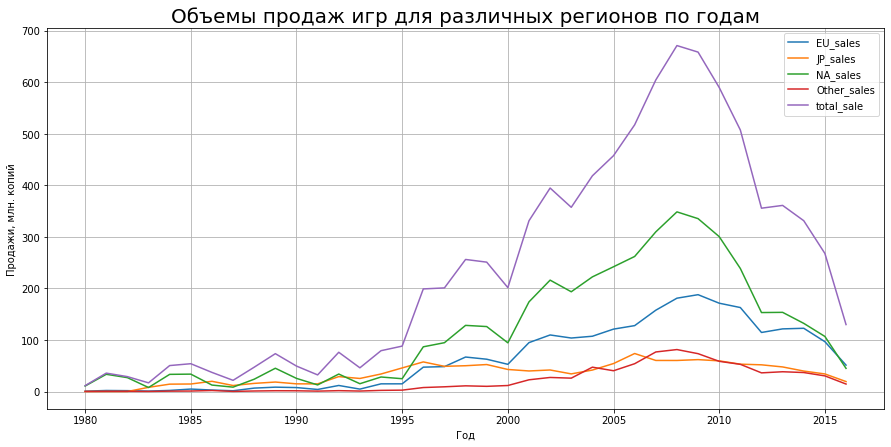

In [25]:
sales_by_year = df.pivot_table(
    index = 'Year_of_Release', values = ['NA_sales', 'EU_sales','JP_sales','Other_sales'], aggfunc = 'sum')
sales_by_year['total_sale'] = sales_by_year.sum(axis = 1)
ax = sales_by_year.plot(figsize = (15,7), legend = True, grid = True)
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, млн. копий')
ax.set_title('Объемы продаж игр для различных регионов по годам',fontsize=20)
None

- Продажи падают пропорционально выпущеным играм;
- Самые высокие продажи в регионе NA (Notrth America);
- Рассмотрим оценки и рейтинги.

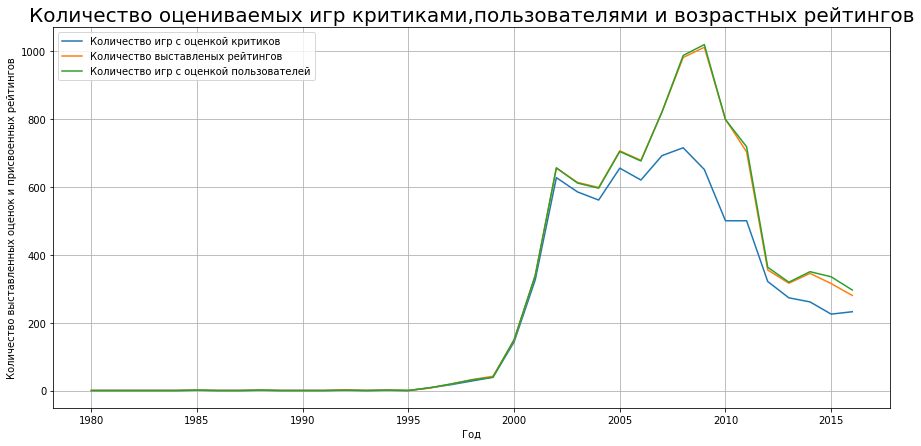

In [26]:
score_amount_by_year = df.pivot_table(
    index = 'Year_of_Release', values = ['Critic_Score','User_Score', 'Rating'], aggfunc = 'count')

ax = score_amount_by_year.plot(figsize = (15,7), legend = True, grid = True)
ax.set_xlabel('Год')
ax.set_ylabel('Количество выставленных оценок и присвоенных рейтингов')
ax.set_title('Количество оцениваемых игр критиками,пользователями и возрастных рейтингов',fontsize=20)
ax.legend(['Количество игр с оценкой критиков', 'Количество выставленых рейтингов', 'Количество игр с оценкой пользователей'])

None

In [27]:
df[df['User_Score'].notna()]

Name Platform  Year_of_Release       Genre  \
0                         Wii Sports      Wii           2006.0      Sports   
2                     Mario Kart Wii      Wii           2008.0      Racing   
3                  Wii Sports Resort      Wii           2009.0      Sports   
6              New Super Mario Bros.       DS           2006.0    Platform   
7                           Wii Play      Wii           2006.0        Misc   
...                              ...      ...              ...         ...   
16698               Mega Brain Boost       DS           2008.0      Puzzle   
16702        STORM: Frontline Nation       PC           2011.0    Strategy   
16704                       Plushees       DS           2008.0  Simulation   
16705                        15 Days       PC           2009.0   Adventure   
16706  Men in Black II: Alien Escape       GC           2003.0     Shooter   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
0         41.36     28.96      3.77         8.45          76.0          8   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
6         11.28      9.14      6.50         2.88          89.0        8.5   
7         13.96      9.18      2.93         2.84          58.0        6.6   
...         ...       ...       ...          ...           ...        ...   
16698      0.01      0.00      0.00         0.00          48.0        tbd   
16702      0.00      0.01      0.00         0.00          60.0        7.2   
16704      0.01      0.00      0.00         0.00           NaN        tbd   
16705      0.00      0.01      0.00         0.00          63.0        5.8   
16706      0.01      0.00      0.00         0.00           NaN        tbd   

      Rating  
0          E  
2          E  
3          E  
6          E  
7          E  
...      ...  
16698      E  
16702   E10+  
16704      E  
16705    NaN  
16706      T  

[10014 rows x 11 columns]

In [28]:
print("Количество значений 'tbd' в пользовательских оценках: ", df.query('User_Score == "tbd"')['User_Score'].count())

Количество значений 'tbd' в пользовательских оценках:  2424


- Для просмотра динамики оценок необходимо обработать пропуски и значения в рейтингах пользователей;
- Проверим, отличаются ли продажи игр с пользовательским рейтингом tdb от прочих.

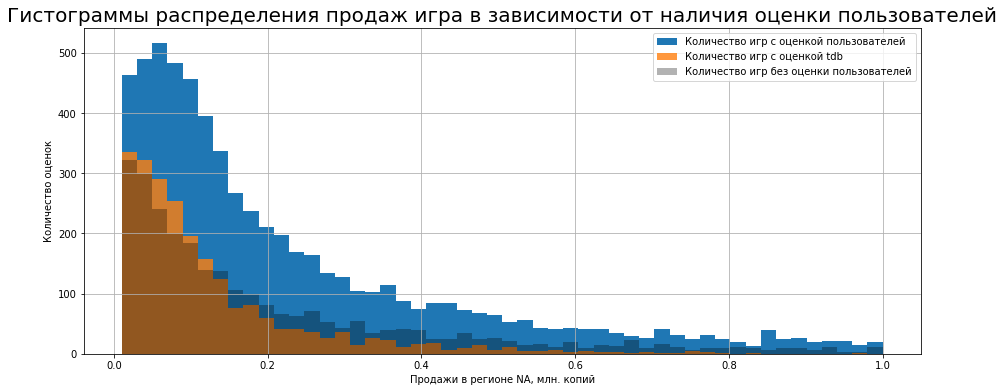

In [29]:
ax = df.query('(User_Score != "tbd") and (User_Score.notna())')['NA_sales'].hist(bins = 50, range = (0.01, 1), figsize = (15,6))
df.query('User_Score == "tbd"')['NA_sales'].hist(bins = 50, range = (0.01, 1), alpha = 0.8)
df.query('User_Score != User_Score')['NA_sales'].hist(bins = 50, range = (0.01, 1), alpha = 0.3, color = 'black')
ax.set_xlabel('Продажи в регионе NA, млн. копий')
ax.set_ylabel('Количество оценок')
ax.set_title('Гистограммы распределения продаж игра в зависимости от наличия оценки пользователей',fontsize=20)
ax.legend(['Количество игр с оценкой пользователей', 'Количество игр с оценкой tdb', 'Количество игр без оценки пользователей'])
None

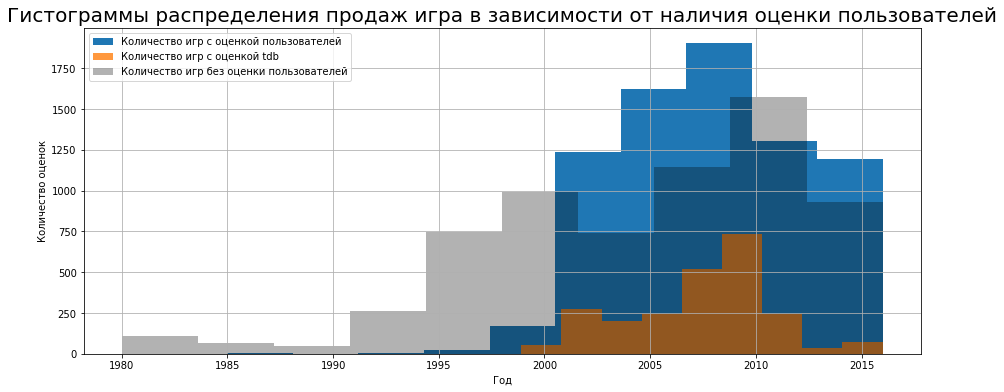

In [30]:
ax = df.query('(User_Score != "tbd") and (User_Score.notna())')['Year_of_Release'].hist(figsize = (15,6))
df.query('User_Score == "tbd"')['Year_of_Release'].hist(alpha = 0.8)
df.query('User_Score != User_Score')['Year_of_Release'].hist(alpha = 0.3, color = 'black')
ax.set_xlabel('Год')
ax.set_ylabel('Количество оценок')
ax.set_title('Гистограммы распределения продаж игра в зависимости от наличия оценки пользователей',fontsize=20)
ax.legend(['Количество игр с оценкой пользователей', 'Количество игр с оценкой tdb', 'Количество игр без оценки пользователей'])
None


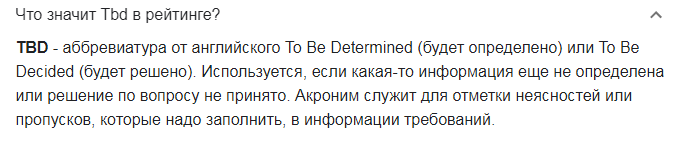
    

- Рейтинг TBD для анализа невозможно использовать, поэтому его необходимо заменить на пустые значения;
- Оценки пользователей можно заменить в теории на оценки критиков, но это испортит весь анализ.

In [31]:
df['Rating'].value_counts()


E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [32]:
display(df.query('Rating == ["EC","K-A","RP","AO"]'))


Name Platform  \
656                                     Theme Hospital       PC   
875                      Grand Theft Auto: San Andreas       XB   
903                                 PaRappa The Rapper       PS   
4297                         Nickelodeon Team Umizoomi       DS   
5034          Sesame Street: Elmo's A-to-Zoo Adventure      Wii   
6046         Sesame Street: Cookie's Counting Carnival      Wii   
6764   Dora the Explorer: Journey to the Purple Planet      PS2   
7586           Ni Hao, Kai-lan: New Year's Celebration       DS   
9960   Dora the Explorer: Journey to the Purple Planet       GC   
13065        Sesame Street: Cookie's Counting Carnival       PC   
13455         Sesame Street: Elmo's A-to-Zoo Adventure       PC   
13672                                Clockwork Empires       PC   
14270                          Supreme Ruler: Cold War       PC   
16180                WRC: FIA World Rally Championship       PC   
16681                                          Worms 2       PC   

       Year_of_Release      Genre  NA_sales  EU_sales  JP_sales  Other_sales  \
656             1997.0   Strategy      2.30      0.10      0.00         0.00   
875             2005.0     Action      1.26      0.61      0.00         0.09   
903             1996.0       Misc      0.26      0.16      1.46         0.03   
4297            2011.0     Action      0.42      0.00      0.00         0.03   
5034            2010.0       Misc      0.35      0.00      0.00         0.02   
6046            2010.0       Misc      0.27      0.00      0.00         0.02   
6764            2005.0  Adventure      0.12      0.09      0.00         0.03   
7586            2009.0       Misc      0.19      0.00      0.00         0.01   
9960            2005.0  Adventure      0.09      0.02      0.00         0.00   
13065           2010.0       Misc      0.05      0.00      0.00         0.00   
13455           2010.0       Misc      0.04      0.00      0.00         0.00   
13672              NaN   Strategy      0.00      0.04      0.00         0.00   
14270           2011.0   Strategy      0.00      0.03      0.00         0.01   
16180              NaN     Racing      0.00      0.01      0.00         0.00   
16681           1997.0   Strategy      0.00      0.01      0.00         0.00   

       Critic_Score User_Score Rating  
656             NaN          9    K-A  
875            93.0        8.6     AO  
903            92.0        7.4    K-A  
4297            NaN        tbd     EC  
5034            NaN        tbd     EC  
6046            NaN        tbd     EC  
6764            NaN          7     EC  
7586            NaN        tbd     EC  
9960            NaN        tbd     EC  
13065           NaN        tbd     EC  
13455           NaN        tbd     EC  
13672          58.0        3.8     RP  
14270          63.0        6.8     RP  
16180          65.0        NaN     RP  
16681           NaN        8.1    K-A

- Есть редкие и спецефические рейтинги;
- Для них нет никаких заметных особенностей;
- Выборка по этим рейтингам очень низкая, их стоит удалить.


/tmp/ipykernel_82/2555073263.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_82/2555073263.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



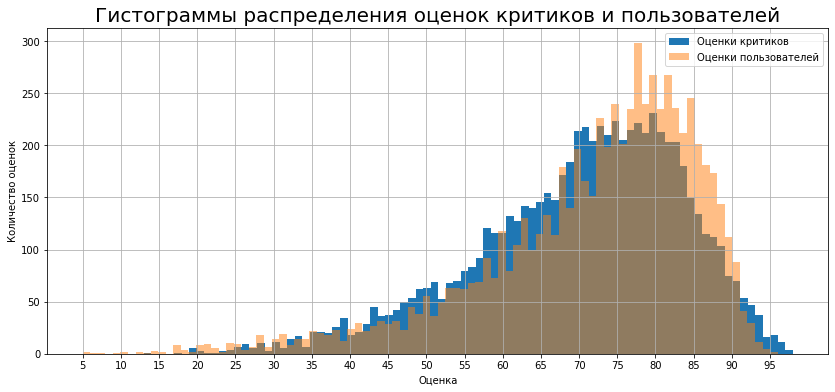

In [33]:
df_score_comparasment = pd.DataFrame()
df_score_comparasment = df.query('(User_Score.notna()) and (User_Score != "tbd") and (Critic_Score.notna())')
df_score_comparasment['User_Score'] = df_score_comparasment['User_Score'].astype('float64', errors='ignore')
df_score_comparasment['User_Score'] = df_score_comparasment['User_Score']*10
ax = df_score_comparasment['Critic_Score'].hist(bins = 86, figsize = (14,6))
bx =  df_score_comparasment['User_Score'].hist(bins = 92, alpha = 0.5)
ax.set_xlabel('Оценка')
ax.set_ylabel('Количество оценок')
ax.set_title('Гистограммы распределения оценок критиков и пользователей',fontsize=20)
ax.legend(['Оценки критиков', 'Оценки пользователей'])
ax.set_xticks(range(5,100,5))
None


In [34]:
df_score_comparasment.loc[:,'total_sales'] = df_score_comparasment.loc[:,'NA_sales':'Other_sales'].sum(axis = 1)
df_score_comparasment

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Name Platform  Year_of_Release      Genre  \
0                             Wii Sports      Wii           2006.0     Sports   
2                         Mario Kart Wii      Wii           2008.0     Racing   
3                      Wii Sports Resort      Wii           2009.0     Sports   
6                  New Super Mario Bros.       DS           2006.0   Platform   
7                               Wii Play      Wii           2006.0       Misc   
...                                  ...      ...              ...        ...   
16673     Mortal Kombat: Deadly Alliance      GBA           2002.0   Fighting   
16692  Metal Gear Solid V: Ground Zeroes       PC           2014.0     Action   
16696                             Breach       PC           2011.0    Shooter   
16702            STORM: Frontline Nation       PC           2011.0   Strategy   
16705                            15 Days       PC           2009.0  Adventure   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  User_Score  \
0         41.36     28.96      3.77         8.45          76.0        80.0   
2         15.68     12.76      3.79         3.29          82.0        83.0   
3         15.61     10.93      3.28         2.95          80.0        80.0   
6         11.28      9.14      6.50         2.88          89.0        85.0   
7         13.96      9.18      2.93         2.84          58.0        66.0   
...         ...       ...       ...          ...           ...         ...   
16673      0.01      0.00      0.00         0.00          81.0        88.0   
16692      0.00      0.01      0.00         0.00          80.0        76.0   
16696      0.01      0.00      0.00         0.00          61.0        58.0   
16702      0.00      0.01      0.00         0.00          60.0        72.0   
16705      0.00      0.01      0.00         0.00          63.0        58.0   

      Rating  total_sales  
0          E        82.54  
2          E        35.52  
3          E        32.77  
6          E        29.80  
7          E        28.91  
...      ...          ...  
16673      M         0.01  
16692      M         0.01  
16696      T         0.01  
16702   E10+         0.01  
16705    NaN         0.01  

[7017 rows x 12 columns]

In [35]:
df_score_comparasment.corr()

Year_of_Release  NA_sales  EU_sales  JP_sales  Other_sales  \
Year_of_Release         1.000000 -0.020471  0.038022 -0.041715     0.038807   
NA_sales               -0.020471  1.000000  0.839998  0.467134     0.727141   
EU_sales                0.038022  0.839998  1.000000  0.518734     0.716482   
JP_sales               -0.041715  0.467134  0.518734  1.000000     0.394249   
Other_sales             0.038807  0.727141  0.716482  0.394249     1.000000   
Critic_Score           -0.011215  0.233367  0.212023  0.146175     0.191105   
User_Score             -0.251482  0.086496  0.055573  0.127103     0.057359   
total_sales             0.002441  0.955492  0.938675  0.612541     0.804503   

                 Critic_Score  User_Score  total_sales  
Year_of_Release     -0.011215   -0.251482     0.002441  
NA_sales             0.233367    0.086496     0.955492  
EU_sales             0.212023    0.055573     0.938675  
JP_sales             0.146175    0.127103     0.612541  
Other_sales          0.191105    0.057359     0.804503  
Critic_Score         1.000000    0.580878     0.236962  
User_Score           0.580878    1.000000     0.088602  
total_sales          0.236962    0.088602     1.000000

- линейных корреляций между оценками и продажами не найдено;
- даже оценки критиков и пользователей слабо коррелируют между собой;
- рассмотрим продажи по жанрам.

In [36]:
sales_by_genre = df.pivot_table(
    index = 'Genre', values = ['NA_sales','EU_sales','JP_sales','Other_sales'], aggfunc = 'sum')
sales_by_genre

EU_sales  JP_sales  NA_sales  Other_sales
Genre                                                  
Action          519.13    161.43    879.01       184.60
Adventure        63.54     52.30    105.26        16.49
Fighting        100.33     87.48    223.36        36.36
Misc            212.74    108.11    407.27        74.39
Platform        200.35    130.83    445.50        51.09
Puzzle           50.01     57.31    122.87        12.38
Racing          236.51     56.71    359.35        76.10
Role-Playing    188.71    355.41    330.81        59.63
Shooter         317.34     38.76    592.24       104.11
Simulation      113.52     63.80    181.92        30.73
Sports          376.79    135.54    684.43       134.51
Strategy         45.17     49.66     68.55        10.85

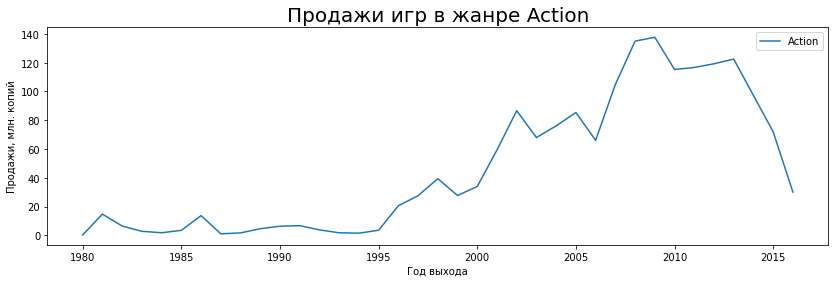

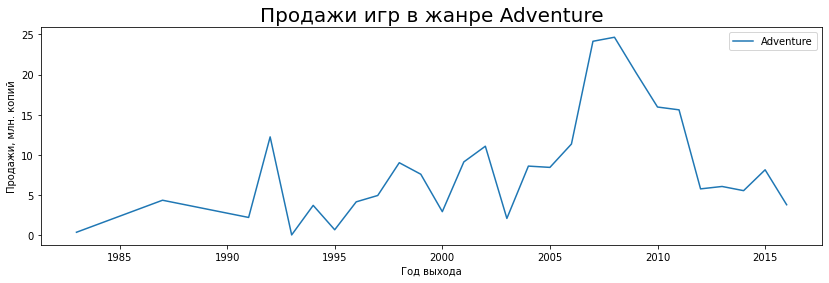

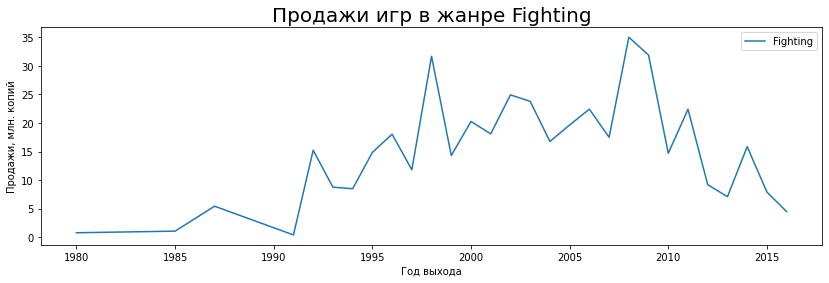

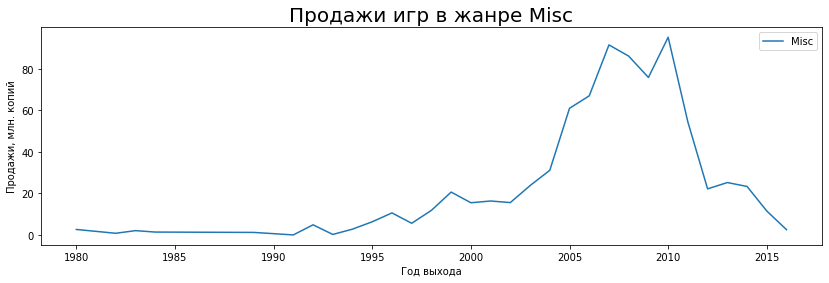

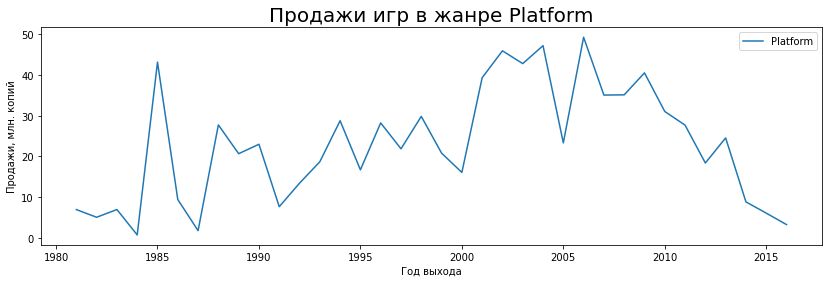

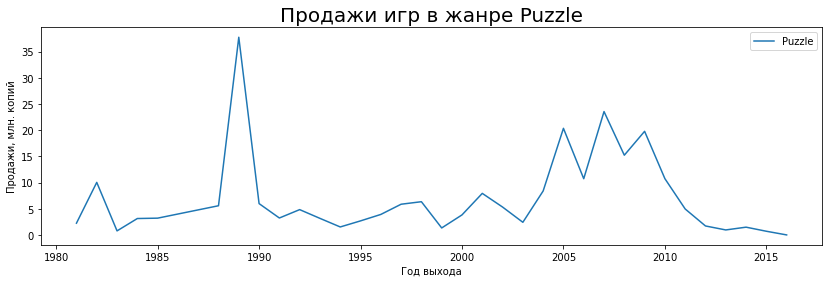

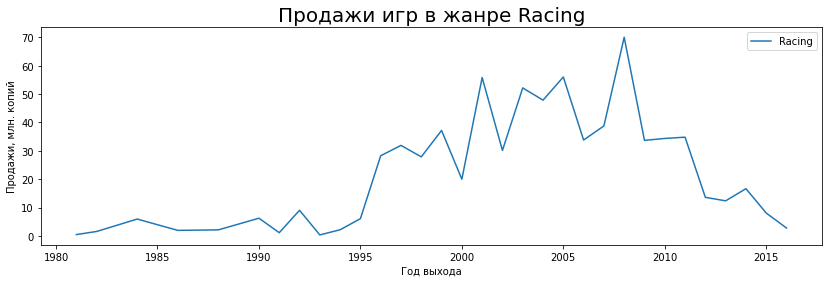

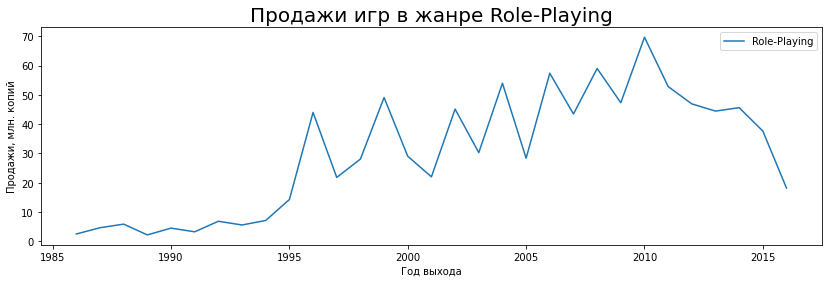

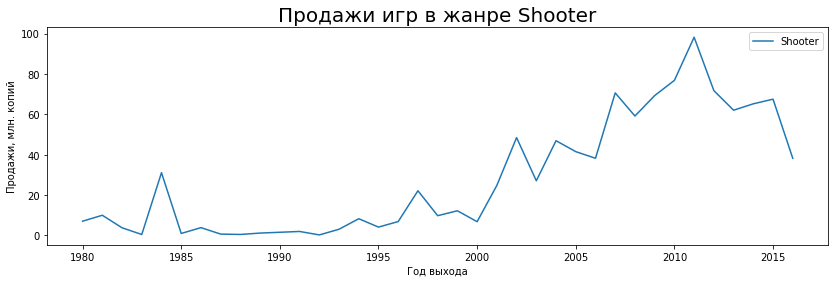

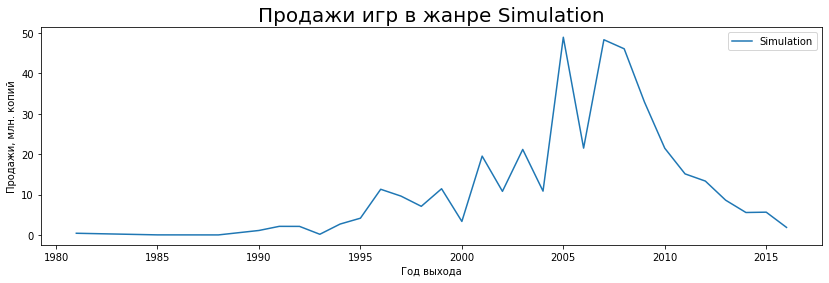

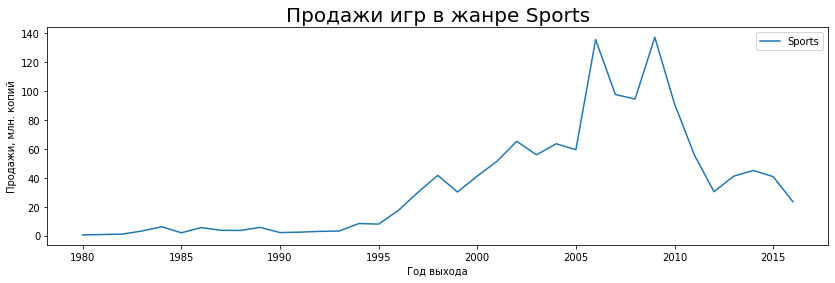

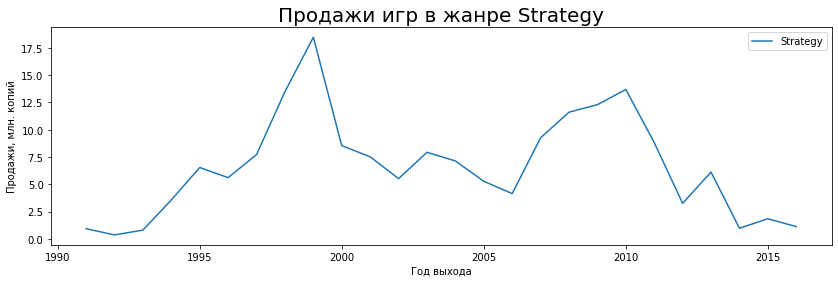

In [37]:
sales_by_genre = df.pivot_table(
    index = ['Genre', 'Year_of_Release'], values = ['NA_sales','EU_sales','JP_sales','Other_sales'], aggfunc = 'sum')

sales_by_genre['total_sales'] = sales_by_genre.sum(axis = 1)
sales_by_genre = sales_by_genre.reset_index()
for x in sales_by_genre['Genre'].unique():
    ax = sales_by_genre.query('Genre == @x').plot(x = 'Year_of_Release', y = 'total_sales', label = x, figsize = (14,4))
    ax.set_xlabel('Год выхода')
    ax.set_ylabel('Продажи, млн. копий')
    ax.set_title(f'Продажи игр в жанре {x}',fontsize=20)
None

- Посмотрим, как продажи корелируют с оценками критиков.

Text(0.5, 1.0, 'Продажи и количество вышедших игр относительно к оценкам критиков')

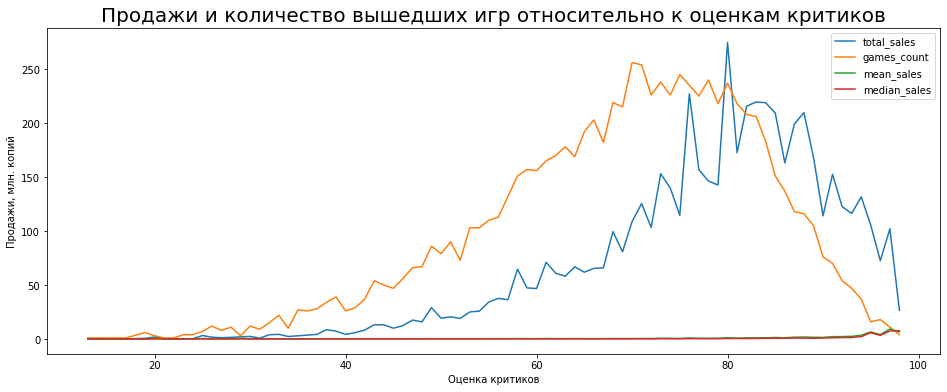

In [38]:

try:
    df_backup = pd.read_csv('C://datasets/games.csv')
except:
    df_backup = pd.read_csv('/datasets/games.csv')

df_backup['total_sales'] = df_backup.loc[:,'NA_sales':'Other_sales'].sum(axis = 1)
sales_by_score_mean = df_backup.pivot_table(
    index = 'Critic_Score', values = 'total_sales', aggfunc = ['sum', 'count', 'mean', 'median'])
sales_by_score_mean.columns = ['total_sales', 'games_count', 'mean_sales', 'median_sales']

ax = sales_by_score_mean.plot(figsize = (16,6))
ax.set_xlabel('Оценка критиков')
ax.set_ylabel('Продажи, млн. копий')
ax.set_title('Продажи и количество вышедших игр относительно к оценкам критиков',fontsize=20)

- Видно, игр с высокой оценкой мало, но они и приносят гозадо больше прибыли в среднем;
- Рассмотрим отдельно графики средней и медианной прибыли в зависимости от оценки критиков.

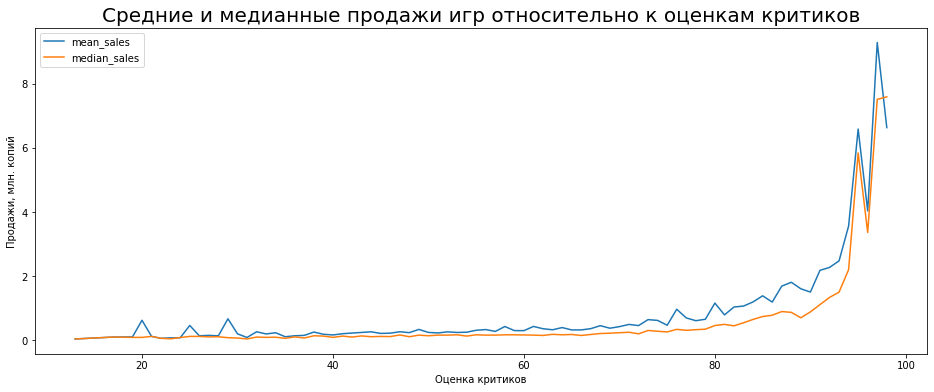

In [39]:
ax = sales_by_score_mean[['mean_sales', 'median_sales']].plot(figsize = (16,6))
ax.set_xlabel('Оценка критиков')
ax.set_ylabel('Продажи, млн. копий')
ax.set_title('Средние и медианные продажи игр относительно к оценкам критиков',fontsize=20)
None

- Посмотрим всё тоже самое, но относительно к оценкам пользователей.

/tmp/ipykernel_82/2170050169.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



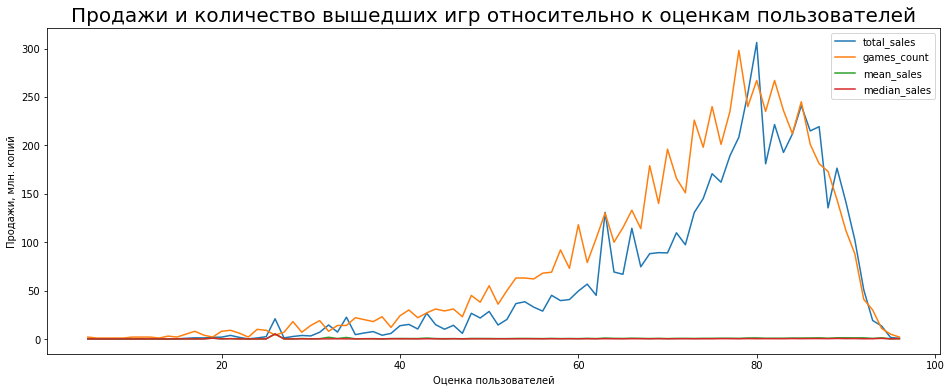

In [40]:
df_score_comparasment['total_sales'] = df_score_comparasment.loc[:,'NA_sales':'Other_sales'].sum(axis = 1)
sales_by_user_score_mean = df_score_comparasment.pivot_table(
    index = 'User_Score', values = 'total_sales', aggfunc = ['sum', 'count', 'mean', 'median'])
sales_by_user_score_mean.columns = ['total_sales', 'games_count', 'mean_sales', 'median_sales']

ax = sales_by_user_score_mean.plot(figsize = (16,6))
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Продажи, млн. копий')
ax.set_title('Продажи и количество вышедших игр относительно к оценкам пользователей',fontsize=20)
None

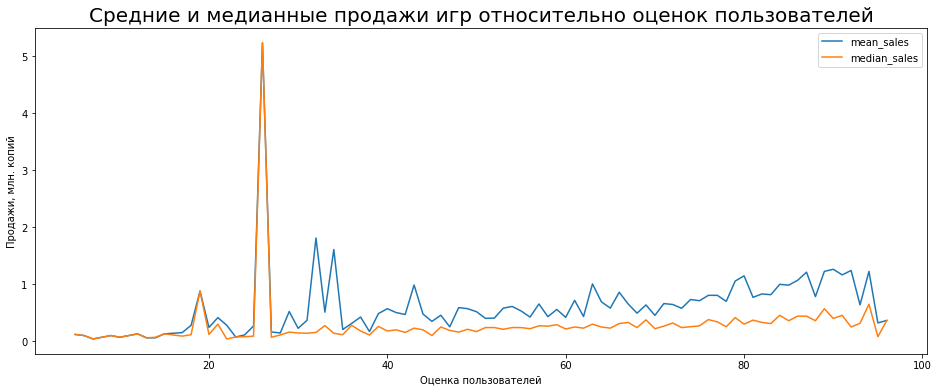

In [41]:
ax = sales_by_user_score_mean[['mean_sales', 'median_sales']].plot(figsize = (16,6))
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Продажи, млн. копий')
ax.set_title('Средние и медианные продажи игр относительно оценок пользователей',fontsize=20)
None

In [42]:
df_score_comparasment.query('User_Score > 25 and User_Score < 30').head()

Name Platform  Year_of_Release     Genre  \
60             Call of Duty: Ghosts     X360           2013.0   Shooter   
69             Call of Duty: Ghosts      PS3           2013.0   Shooter   
675   Kinect: Disneyland Adventures     X360           2011.0      Misc   
1828                  Guitar Hero 5      PS2           2009.0      Misc   
3047                    Thrillville      PS2           2006.0  Strategy   

      NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  User_Score  \
60        6.73      2.56      0.04         0.91          73.0        26.0   
69        4.10      3.63      0.38         1.25          71.0        26.0   
675       1.73      0.43      0.02         0.17          73.0        29.0   
1828      0.28      0.30      0.00         0.54          71.0        26.0   
3047      0.55      0.02      0.00         0.09          69.0        29.0   

     Rating  total_sales  
60        M        10.24  
69        M         9.36  
675    E10+         2.35  
1828      T         1.12  
3047   E10+         0.66

- Любовь сквозь ненавись. Call of Duty: Ghosts.

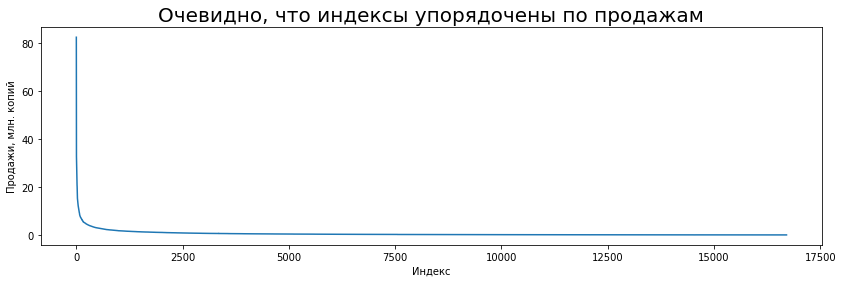

In [43]:
ax = df_score_comparasment['total_sales'].plot(figsize = (14,4))
ax.set_xlabel('Индекс')
ax.set_ylabel('Продажи, млн. копий')
ax.set_title('Очевидно, что индексы упорядочены по продажам',fontsize=20)
None

In [44]:
print(df.loc[0:2500,'NA_sales':'Other_sales'].sum(axis = 1).sum())
print(df.loc[2501:,'NA_sales':'Other_sales'].sum(axis = 1).sum())

6096.28
2817.01


- сумарные продажи первых 2500 строк в - это 70% всех продаж из 17 тысяч игр.

### Подытог

1)	Мы уже избавились от двух строк, в которых не содержатся названия игр и год выхода.
    
2)	У некоторых игр, где отсутствует год выпуска, он есть в названии самой игры, правда с опережением на год. FIFA 2012 выходит в 2011 году, но так не во всех случаях.
    
3)	Присутствуют непрямые дубликаты. Одна и та же игра может выпускаться на разных платформах в разные годы. У таких неявных дубликатов очень разные оценки пользователей/критиков, а так же продажи. Продажи таких игр не являются независимыми друг от друга.
    
4)	Присутствую «франшизы». Например большое количество игр с подзаголовком «LEGO» или «FIFA». 
    
5)	В названиях некоторых игр указаны комментарии, которые прямо указывают на недостоверность значений в таблице. Например, объединённые продажи по всем платформам под платформой «PC».  Таких значений 279 из 16713. Учитывая их низкое количество, правильным будет исключить их из исследования, однако делать это аккуратно. Некоторые комментарии содержат просто год выхода игры.
    
6)	В наборе есть данные по 31 платформе, при этом для многих из них игры уже не выпускаются. По состоянию на 2016 год, игры выпускались только на 9 из них.
    
7)	Топ-3 платформ по количеству игр в каждый год разный.
    
8)	По статистике, в среднем игры для платформы выпускаются в течении 7 лет, для 75% платформ – меньше 11 лет. Рекордсмен – персональный компьютер. Игры для него выпускаются уже 26 лет.
    
9)	Наибольшее количество игр выходило в 2008 году, тогда же были максимальные суммарные продажи, после чего рынок начал быстро падать.
    
10)	В наборе рейтингов для игр от пользователей существует значение “tbd”. Не до конца ясно, чем оно обусловлено, но рейтинг критиков для таких игр в среднем ниже, чем для игр с указанным рейтингом от пользователей.
    
11)	Статистически нельзя утверждать (значение p-value значительно меньше 0.01), что игры с рейтингом  “tbd” продаются так же, как игры с отсутствующим или присутствующим рейтингом пользователей, поэтому замена его на пропуск изменит статистические параметры выборки продаж игр без рейтинга (снизит).
    
12)	 У 25 игр (релизов) из 16713 присутствует рейтинг критиков, но нет оценок пользователей. Впрочем, продажи таких игр крайне низкие. 
    
13)	Несмотря на то, что средние рейтинги пользователей хорошо коррелируют с рейтингом критиков, в частных случаях они значительно отличаются.
    
14)	Очень низкие значения линейной корреляции между рейтингами пользователей или критиков и продажами игры. Зависимость тут нелинейная.
    
15)	Больше всего игр продается в регионе NA (предположительно, North America).
    
16)	99.9% игр имеют один из 4-х рейтингов. 15 игр имеют редкие рейтинги, которые лучше всего удалить из исследования.
    
17)	Оценки игроков и критиков имеют ассиметричное нормальное распределение вытянутое влево. Пиком распределения оценок критиков является 70 баллов, у пользователей – 8.0 баллов (приблизительно).
    
18)	Практически по всем жанрам, кроме стратегий, пик продаж приходится на интервал 2005 – 2010 годов. У стратегий это 1997 – 2000 гг.
    
19)	 Линейной корреляции между рейтингом критиков или пользователей не выявлено, но в среднем игры с более высокими оценками критиков продаются большим числом копий.
    
20)	В некоторых случаях низкие оценки пользователей абсолютно не коррелируют с продажами игр и оценками критиков. Скорее всего, пользователи частно выражают свое отношение к некоторым аспектам политики или решений компании крайне негативно, но при этом не отказываются от покупки игры.
    
21)	Исходные данные уже упорядочены по числу проданных копий на разных рынках в порядке убывания.
    
22)	Первые 2.5 тысячи строк из почти 17 тысяч составляют игры, на которые приходится 67% проданных копий.
    
23)	Набор представленных игр не полный. Топ игр по продажам в таблице не совпадает с топом по продажам в интернете. Нужно об этом помнить, что мы работаем лишь с выборкой.



</div>

## Подготовка данных

 - Приведем названия столбцов к нижнему регистру;
 - Преобразуем данные к нужным типам;
 - Обработаем пропуски.
 - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.



In [45]:
df['Name'] = df['Name'].str.lower()
df['Platform'] = df['Platform'].str.lower()
df['Genre'] = df['Genre'].str.lower()
df['Rating'] = df['Rating'].str.lower()
df.columns = df.columns.str.lower()
df

name platform  year_of_release         genre  \
0                         wii sports      wii           2006.0        sports   
1                  super mario bros.      nes           1985.0      platform   
2                     mario kart wii      wii           2008.0        racing   
3                  wii sports resort      wii           2009.0        sports   
4           pokemon red/pokemon blue       gb           1996.0  role-playing   
...                              ...      ...              ...           ...   
16710  samurai warriors: sanada maru      ps3           2016.0        action   
16711               lma manager 2007     x360           2006.0        sports   
16712        haitaka no psychedelica      psv           2016.0     adventure   
16713               spirits & spells      gba           2003.0      platform   
16714            winning post 8 2016      psv           2016.0    simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
0          e  
1        NaN  
2          e  
3          e  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16713 rows x 11 columns]

In [46]:
df['name'].duplicated().describe()

count     16713
unique        2
top       False
freq      11559
Name: name, dtype: object

In [47]:
display(df[df['name'].duplicated()]['year_of_release'].isna().sum())

105

- есть дублирующиеся названия, при этом у 105 из них пропущен год выпуска.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


In [49]:
#Присваиваем играм, у которых отсутствует год выхода средний, округленный вверх, год выхода игр с таким же названием 
for index, ourname in df['name'].items():
    if df.loc[index, 'year_of_release'] != df.loc[index, 'year_of_release']:  
        df.loc[index, 'year_of_release'] ={
        np.ceil(df[df['name'] == ourname]['year_of_release'].mean()) 
                }
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


- Осталось 146 игр без года выхода

In [50]:
df.query('year_of_release.isna()').head(20)

name platform  year_of_release  \
475                 wwe smackdown vs. raw 2006      ps2              NaN   
627                                  rock band     x360              NaN   
657   frogger's adventures: temple of the frog      gba              NaN   
805                                  rock band      wii              NaN   
1142                                 rock band      ps3              NaN   
1301                            triple play 99       ps              NaN   
1506                                 adventure     2600              NaN   
1585                                    combat     2600              NaN   
1840                                 rock band      ps2              NaN   
1984               legacy of kain: soul reaver       ps              NaN   
2010                      donkey kong land iii       gb              NaN   
2106                            air-sea battle     2600              NaN   
2108                              suikoden iii      ps2              NaN   
2169                                  yakuza 4      ps3              NaN   
2773                       warioware: twisted!      gba              NaN   
2969                    test drive unlimited 2     x360              NaN   
3187                          monster hunter 2      ps2              NaN   
3233                    test drive unlimited 2      ps3              NaN   
3289                advance wars: days of ruin       ds              NaN   
3883                             fishing derby     2600              NaN   

             genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
475       fighting      1.57      1.02      0.00         0.41           NaN   
627           misc      1.93      0.33      0.00         0.21          92.0   
657      adventure      2.15      0.18      0.00         0.07          73.0   
805           misc      1.33      0.56      0.00         0.20          80.0   
1142          misc      0.99      0.41      0.00         0.22          92.0   
1301        sports      0.81      0.55      0.00         0.10           NaN   
1506     adventure      1.21      0.08      0.00         0.01           NaN   
1585        action      1.17      0.07      0.00         0.01           NaN   
1840          misc      0.71      0.06      0.00         0.35          82.0   
1984        action      0.58      0.40      0.00         0.07          91.0   
2010      platform      0.68      0.31      0.00         0.04           NaN   
2106       shooter      0.91      0.06      0.00         0.01           NaN   
2108  role-playing      0.29      0.23      0.38         0.08          86.0   
2169        action      0.15      0.13      0.63         0.05          78.0   
2773        puzzle      0.16      0.06      0.50         0.02           NaN   
2969        racing      0.30      0.31      0.00         0.07          68.0   
3187  role-playing      0.00      0.00      0.63         0.00           NaN   
3233        racing      0.16      0.34      0.01         0.12          70.0   
3289      strategy      0.43      0.12      0.00         0.05          86.0   
3883        sports      0.48      0.03      0.00         0.01           NaN   

     user_score rating  
475         NaN    NaN  
627         8.2      t  
657         tbd      e  
805         6.3      t  
1142        8.4      t  
1301        NaN    NaN  
1506        NaN    NaN  
1585        NaN    NaN  
1840        6.8      t  
1984          9      t  
2010        NaN    NaN  
2106        NaN    NaN  
2108        7.7      t  
2169          8      m  
2773        NaN    NaN  
2969        6.4      t  
3187        NaN    NaN  
3233        6.1      t  
3289        8.7   e10+  
3883        NaN    NaN

- Игр без года выхода в первых двух тысячах строк меньше десяти. Смело удаляем пропуски и меняем тип на целое число.

In [51]:
df = df.dropna(subset=['year_of_release'], inplace=False)
df['year_of_release'] =  df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


/tmp/ipykernel_82/3099094775.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



- Избавимся от редких рейтингов. Выборка по ним не репрезентативна.

In [52]:
df = df.loc[df['rating'] != 'ec']
df = df.loc[df['rating'] != 'k-a']
df = df.loc[df['rating'] != 'rp']
df = df.loc[df['rating'] != 'ao']
df['rating'].value_counts()

e       3958
t       2930
m       1554
e10+    1412
Name: rating, dtype: int64

- Если посмотреть срез по 2000 самым продаваемым играм, то видно, что в них очень мало игр в пользователейским рейтингом 'tbd', и они в основном относятся к старым или портативным консолям, а так же wii. Это можно сказать "казуальные" платформы, которые расчитаны не на тех, кто выставляет оценки в интернете. Соответственно, если поискать в интернете, то 'tbd' - означает "будет определен" и выставляется, когда оценок слишком мало для адекватной "средней". Таким образом, потратив пару часов мы пришли к простейшему решению - заменить 'tbd' на пропуски, ведь по сути это они и есть; 

- Этот вывод так же корелируется с более низкими оценками критиков. "Плохие" игры часто непопулярны, а казуальные делаются не самого высокого качества;
    
- Анализ пропусков по 2000 самым продаваемым играм показал, что в большей части нет рейтингов у старых игр, выпущенных до 2003 года, либо у малопопулярных и, наверняка, казуальных игр. Так же видно, что 4 игр из топ 2000 без оценки пользователей есть рейтинг критиков и только у 5 есть возрастной рейтинг, что так же подтверждает, что многие пропуски у популярных игр из-за раннего года выхода и слабого распространения интернета в то время;
    
- Заполнять значения 'tbd' на оценки критиков не стоит, их нужно заменить на пропуски.

In [53]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df[df['user_score'].notna()]['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7'], dtype=object)

In [54]:
df['user_score'] =  df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16553 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16553 non-null  object 
 1   platform         16553 non-null  object 
 2   year_of_release  16553 non-null  int64  
 3   genre            16553 non-null  object 
 4   na_sales         16553 non-null  float64
 5   eu_sales         16553 non-null  float64
 6   jp_sales         16553 non-null  float64
 7   other_sales      16553 non-null  float64
 8   critic_score     8071 non-null   float64
 9   user_score       7534 non-null   float64
 10  rating           9854 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


- Добавим данные по суммарным продажам всех регионов

In [55]:
df['total_sales'] = df.loc[:,'na_sales':'other_sales'].sum(axis = 1)
df = df.reset_index()
df = df.drop(['index'], axis=1)
df.tail(10)

name platform  \
16543                                           15 days       pc   
16544                     men in black ii: alien escape       gc   
16545                                  aiyoku no eustia      psv   
16546                woody woodpecker in crazy castle 5      gba   
16547  score international baja 1000: the official game      ps2   
16548                     samurai warriors: sanada maru      ps3   
16549                                  lma manager 2007     x360   
16550                           haitaka no psychedelica      psv   
16551                                  spirits & spells      gba   
16552                               winning post 8 2016      psv   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
16543             2009   adventure      0.00      0.01      0.00          0.0   
16544             2003     shooter      0.01      0.00      0.00          0.0   
16545             2014        misc      0.00      0.00      0.01          0.0   
16546             2002    platform      0.01      0.00      0.00          0.0   
16547             2008      racing      0.00      0.00      0.00          0.0   
16548             2016      action      0.00      0.00      0.01          0.0   
16549             2006      sports      0.00      0.01      0.00          0.0   
16550             2016   adventure      0.00      0.00      0.01          0.0   
16551             2003    platform      0.01      0.00      0.00          0.0   
16552             2016  simulation      0.00      0.00      0.01          0.0   

       critic_score  user_score rating  total_sales  
16543          63.0         5.8    NaN         0.01  
16544           NaN         NaN      t         0.01  
16545           NaN         NaN    NaN         0.01  
16546           NaN         NaN    NaN         0.01  
16547           NaN         NaN    NaN         0.00  
16548           NaN         NaN    NaN         0.01  
16549           NaN         NaN    NaN         0.01  
16550           NaN         NaN    NaN         0.01  
16551           NaN         NaN    NaN         0.01  
16552           NaN         NaN    NaN         0.01

### Подытог
    
- Сменили тип данных на целые числа в столбце "year_of_release", потому что год - целое число.
    
- Сменили user_score на float, убрав оттуда текстовые значения. Теперь легче анализировать эти данные.
    
- tbd в оценке пользователей сменили на NaN, поскольку это значение выставляется когда отсутвует достаточное количество оценок. Более подробно описал выше.
    
- Сделать оценки критиков целочисленными значениями не вышло из-за пропусков, которые невозможно адекватно заполнить. Тем не менее тип float позволяет анализировать численные данные.
    
- Заполнили где возможно год выхода с помощью дубликатов на других платформах. Поскольку одним из основных данных для анализа является как раз год выхода, пришлось удалить оставшиеся пропуски.
    
- Удалили данные, в названии которых содержались комментарии. В частности, они делали строки недостоверными из-за суммирования продаж по разым платформам или отделяли продажи на отдельных рынках.
    
- Удалили редкие рейтинги, выборка которых слишком низкая для адекватного анализа.
    
- Общее количство выбоки снизилось с 16715 до 16388 или на 2%.
    
- Пропуски в оценках и рейтингах невозможно адекватно заполнить, поскольку даже у одной и той же игры на разных платформах могут быть разные рейтинги и оценки.
    
- В основном пропуски в рейтингах понятны, выходит очень много игр, некоторые только на определенных площадках. Их почти не покупают, на них не тратят время критики и агенства.  
- Всего два пропуска в названиях игр - скорее всего ошибки при выгрузке. Пропуски в данных по году выхода - так же просто ошибки. В некоторых пропусках прямо в названиях игр указан год выхода, не говоря уже об одних и тех же играх на разных платформах.


## Исследовательский анализ данных

- Посмотрим, сколько игр выпускалось в разные годы.

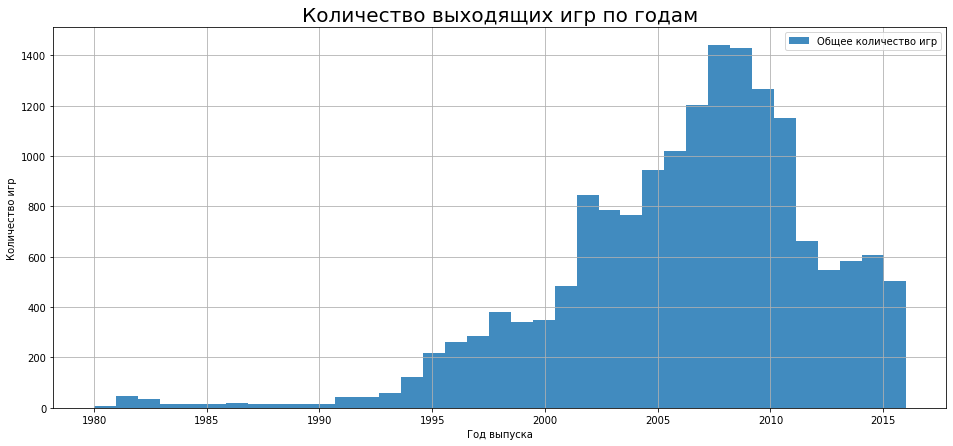

In [56]:
ax = df['year_of_release'].hist(bins = 37, alpha = 0.85, figsize = (16,7), legend = True)
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
ax.set_title('Количество выходящих игр по годам',fontsize=20)
ax.legend(['Общее количество игр'])
None

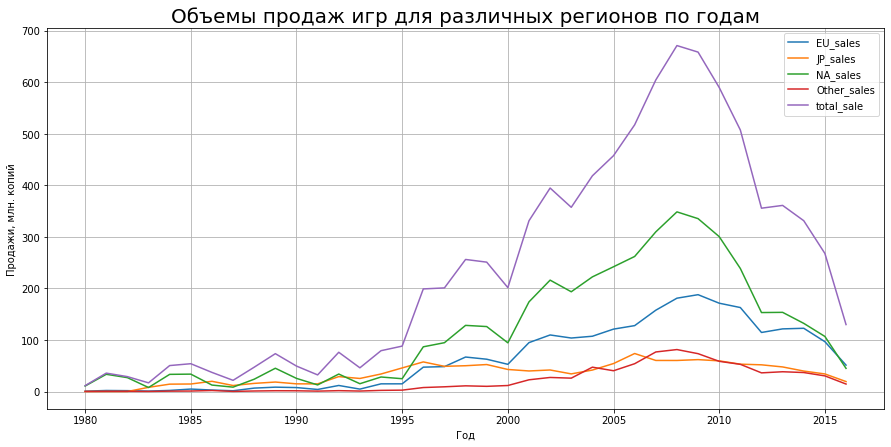

In [57]:
ax = sales_by_year.plot(figsize = (15,7), legend = True, grid = True)
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, млн. копий')
ax.set_title('Объемы продаж игр для различных регионов по годам',fontsize=20)
None

- Как мы уже смотрели ранее, рынок сильно изменился за 37 лет существования, многие платформы уже не актуальны;
- Учитывая резкое падение производства игр, не стоит учитывать данные до 2011 года.


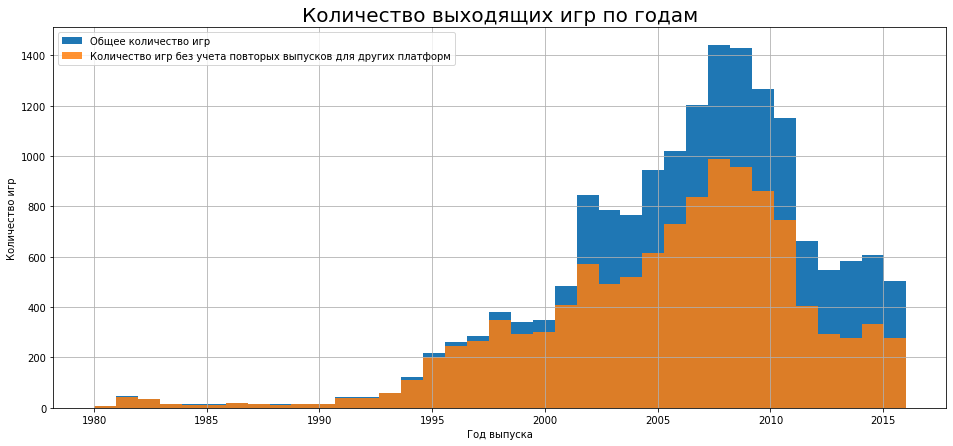

In [62]:
df_unique_games = pd.DataFrame()
df_unique_games = df.drop_duplicates(subset = ['name'])

ax = df['year_of_release'].hist(bins = 37, legend = True, figsize = (16,7))
bx = df_unique_games['year_of_release'].hist(bins = 37, legend = True, alpha = 0.85)

ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
ax.set_title('Количество выходящих игр по годам',fontsize=20)
ax.legend(['Общее количество игр', 'Количество игр без учета повторых выпусков для других платформ'])
None

### Анализ продаж

- Посмотрим, как менялись продажи по платформам;
- Срок жизни платформы, как мы смотрели ранее около 7 лет.

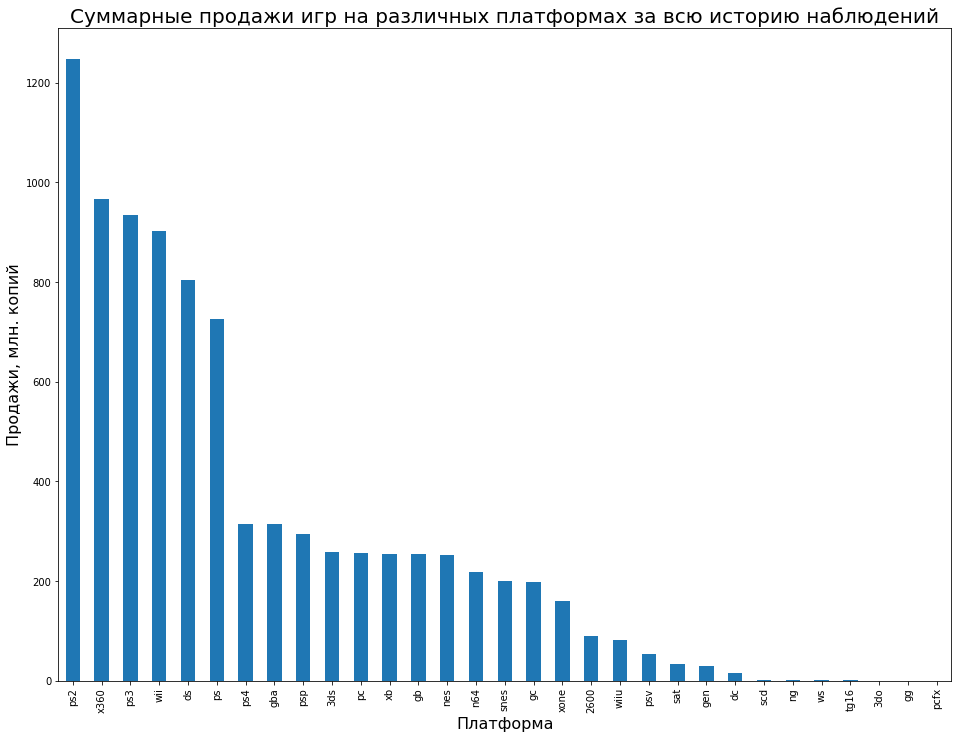

In [68]:
total_sales_by_platform = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
ax = total_sales_by_platform.plot(figsize = (16,12), legend = False, kind = 'bar')

ax.set_xlabel('Платформа',fontsize=16)
ax.set_ylabel('Продажи, млн. копий',fontsize=16)
ax.set_title('Суммарные продажи игр на различных платформах за всю историю наблюдений',fontsize=20)
None

 - Достаточно известный факт - PS2 самая продаваемая игровая платформа в мире. Соответственно и продажи игр для неё тоже.

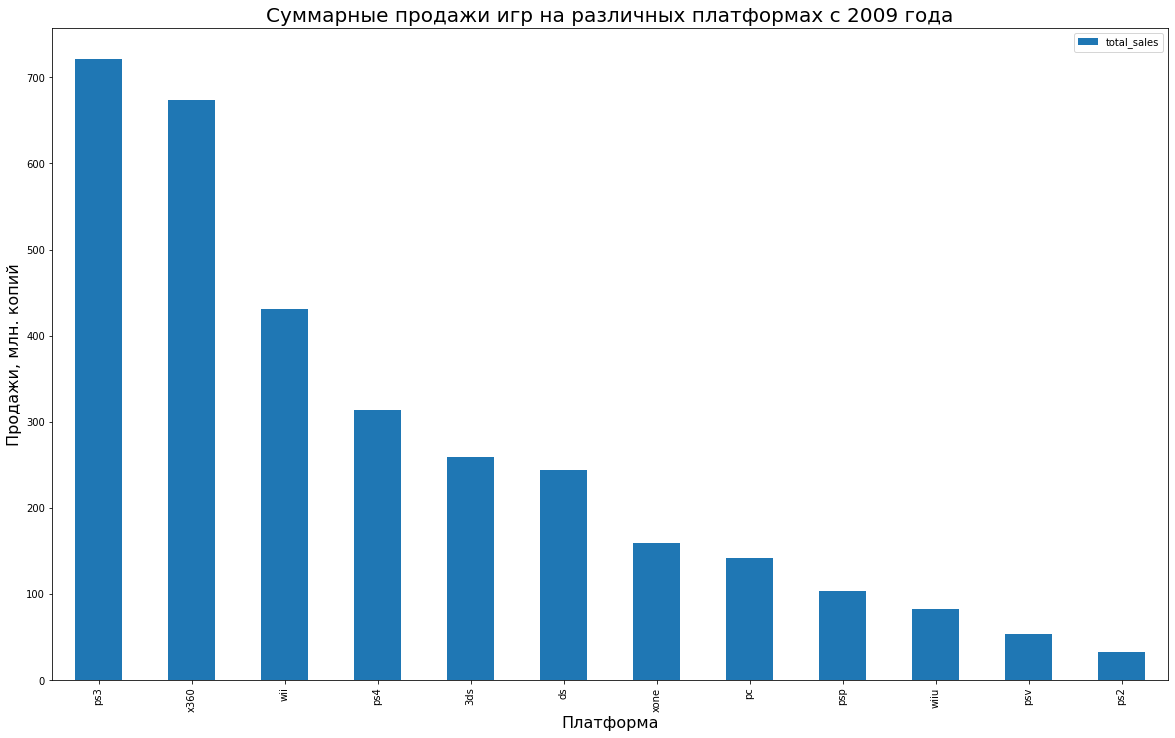

In [81]:
total_sales_by_platform = df.query('year_of_release >2008').pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
ax = total_sales_by_platform.plot(figsize = (20,12), legend = True, kind = 'bar')
ax.set_xlabel('Платформа',fontsize=16)
ax.set_ylabel('Продажи, млн. копий',fontsize=16)
ax.set_title('Суммарные продажи игр на различных платформах с 2009 года',fontsize=20)
None

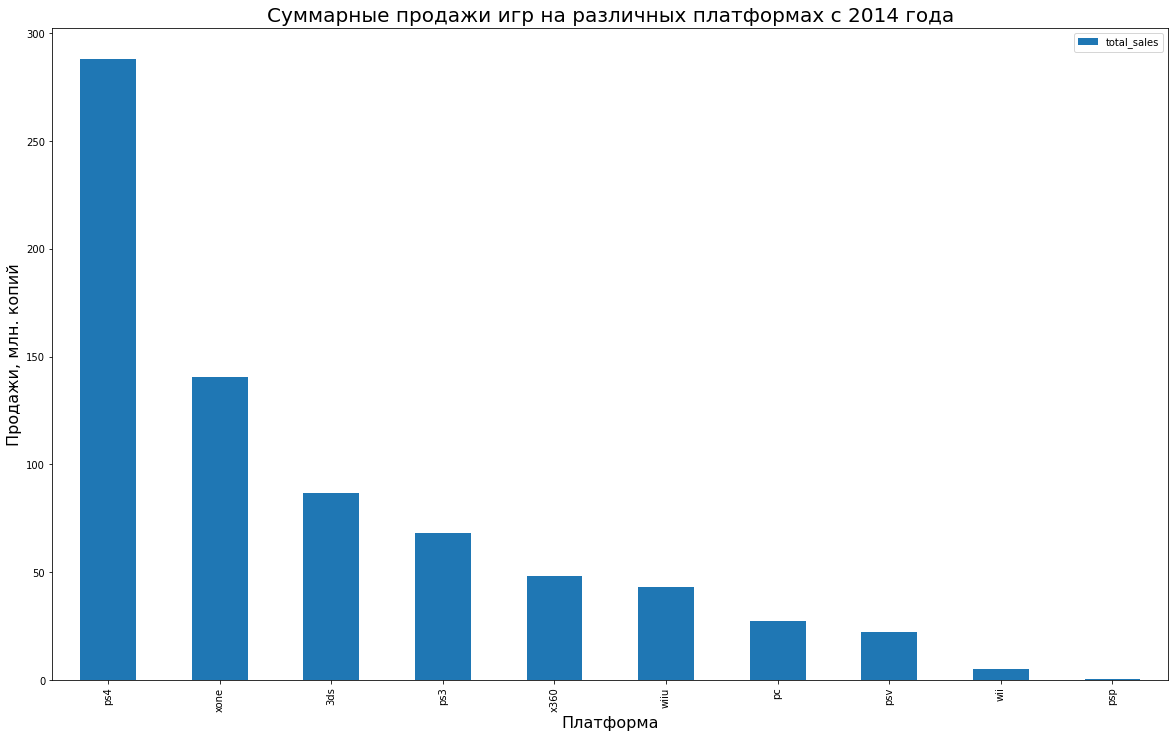

In [83]:
total_sales_by_platform = df.query('year_of_release >2013').pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
ax = total_sales_by_platform.plot(figsize = (20,12), legend = True, kind = 'bar')
ax.set_xlabel('Платформа',fontsize=16)
ax.set_ylabel('Продажи, млн. копий',fontsize=16)
ax.set_title('Суммарные продажи игр на различных платформах с 2014 года',fontsize=20)
None

- Видно, как поколение консолей постепенно меняется. С 2009 года больше продаж у PS3, а c 2013 уже у PS4 и нового XBOX.

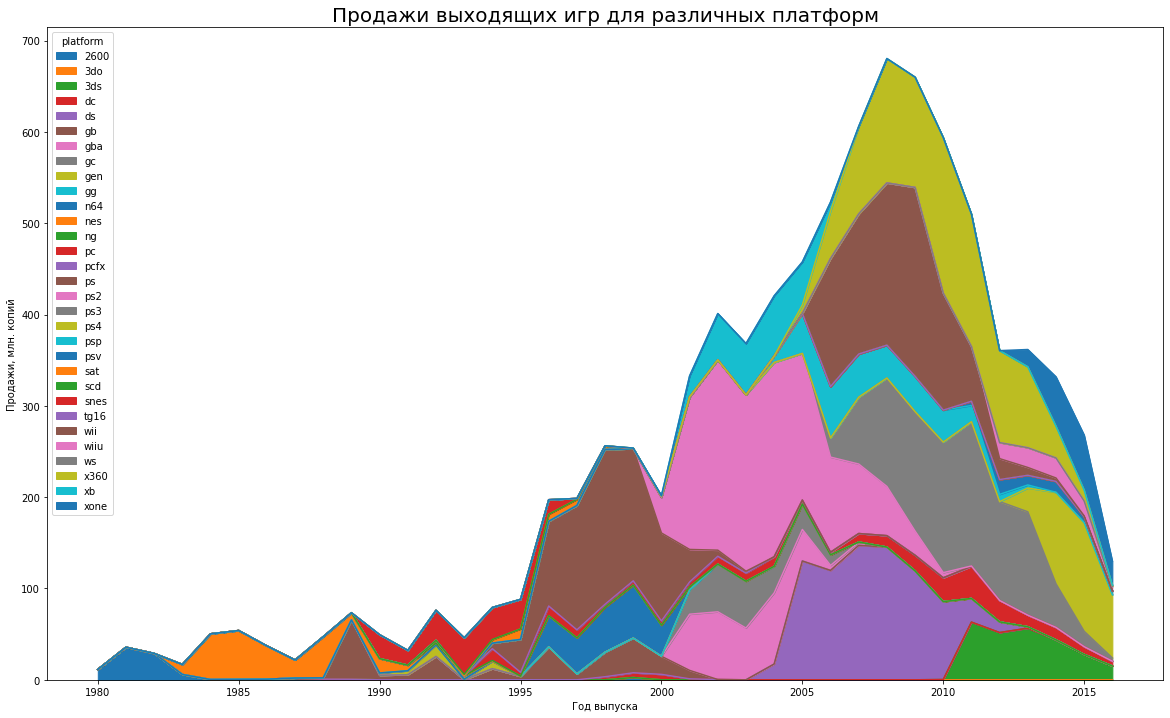

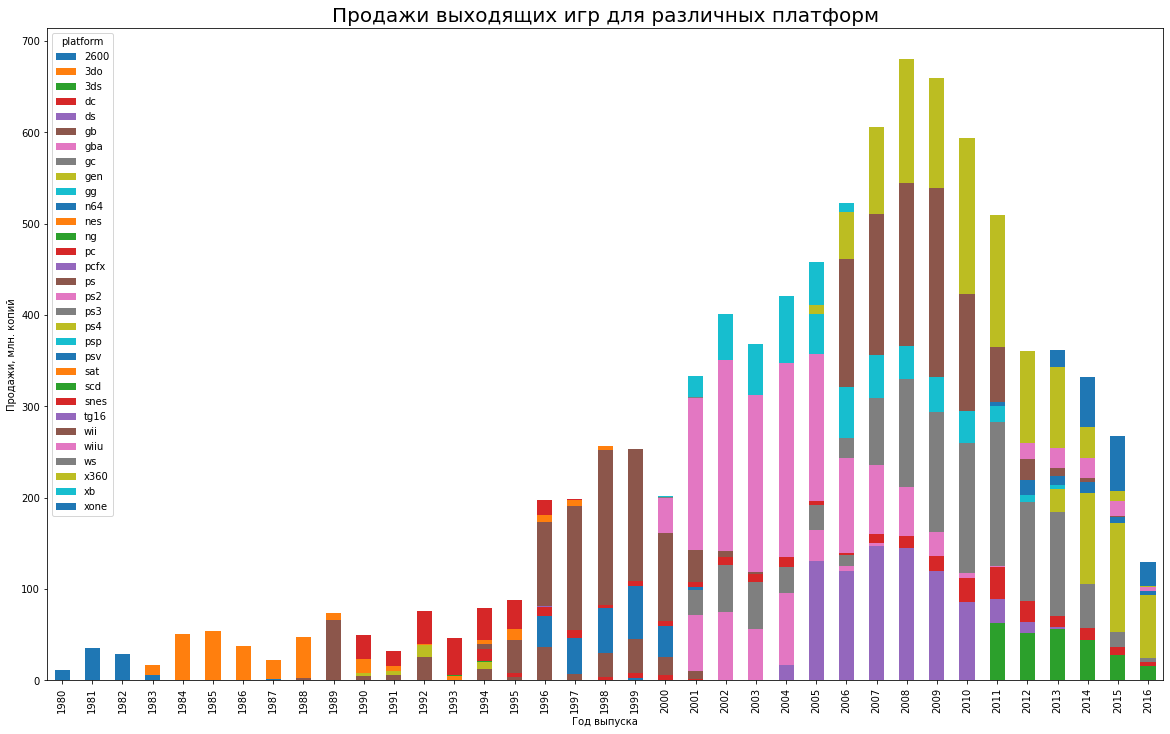

In [93]:
sales_by_platform_by_year = df.pivot_table(
    index = 'year_of_release',  columns = 'platform', values = 'total_sales', aggfunc = 'sum')
ax = sales_by_platform_by_year.plot(figsize = (20,12), legend = True, kind = 'area')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Продажи, млн. копий')
ax.set_title('Продажи выходящих игр для различных платформ',fontsize=20)
bx = sales_by_platform_by_year.plot(figsize = (20,12), legend = True, kind = 'bar', stacked = True)
bx.set_xlabel('Год выпуска')
bx.set_ylabel('Продажи, млн. копий')
bx.set_title('Продажи выходящих игр для различных платформ',fontsize=20)
None

- Посмотрим с 2008 год графики и сократим количество платформ

In [91]:
df.query('year_of_release >2008')['platform'].value_counts()

ps3     1062
ds       913
x360     865
wii      778
psp      664
pc       593
3ds      514
psv      429
ps4      392
xone     247
wiiu     147
ps2      141
Name: platform, dtype: int64

In [92]:
platform_scince_2009_list = ['ps3', 'ds', 'x360', 'wii', 'psp', 'pc', '3ds', 'psv', 'ps4', 'xone', 'wiiu','ps2']
df_for_plot = df.query('year_of_release >2008 and platform.isin(@platform_scince_2009_list)')
df_for_plot

name platform  year_of_release       genre  \
3                  wii sports resort      wii             2009      sports   
8          new super mario bros. wii      wii             2009    platform   
14                kinect adventures!     x360             2010        misc   
15                      wii fit plus      wii             2009      sports   
16                grand theft auto v      ps3             2013      action   
...                              ...      ...              ...         ...   
16543                        15 days       pc             2009   adventure   
16545               aiyoku no eustia      psv             2014        misc   
16548  samurai warriors: sanada maru      ps3             2016      action   
16550        haitaka no psychedelica      psv             2016   adventure   
16552            winning post 8 2016      psv             2016  simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
3         15.61     10.93      3.28         2.95          80.0         8.0   
8         14.44      6.94      4.70         2.24          87.0         8.4   
14        15.00      4.89      0.24         1.69          61.0         6.3   
15         9.01      8.49      2.53         1.77          80.0         7.4   
16         7.02      9.09      0.98         3.96          97.0         8.2   
...         ...       ...       ...          ...           ...         ...   
16543      0.00      0.01      0.00         0.00          63.0         5.8   
16545      0.00      0.00      0.01         0.00           NaN         NaN   
16548      0.00      0.00      0.01         0.00           NaN         NaN   
16550      0.00      0.00      0.01         0.00           NaN         NaN   
16552      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  total_sales  
3          e        32.77  
8          e        28.32  
14         e        21.82  
15         e        21.80  
16         m        21.05  
...      ...          ...  
16543    NaN         0.01  
16545    NaN         0.01  
16548    NaN         0.01  
16550    NaN         0.01  
16552    NaN         0.01  

[6745 rows x 12 columns]

Text(0.5, 1.0, 'Продажи выходящих игр для различных платформ')

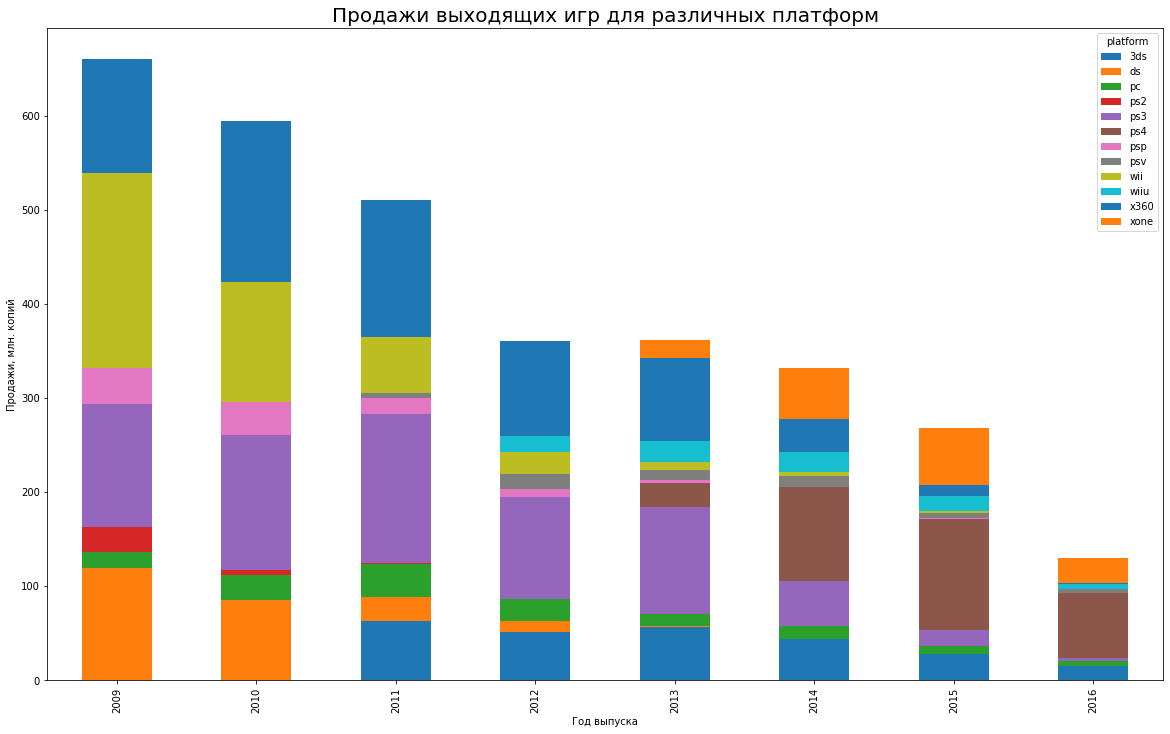

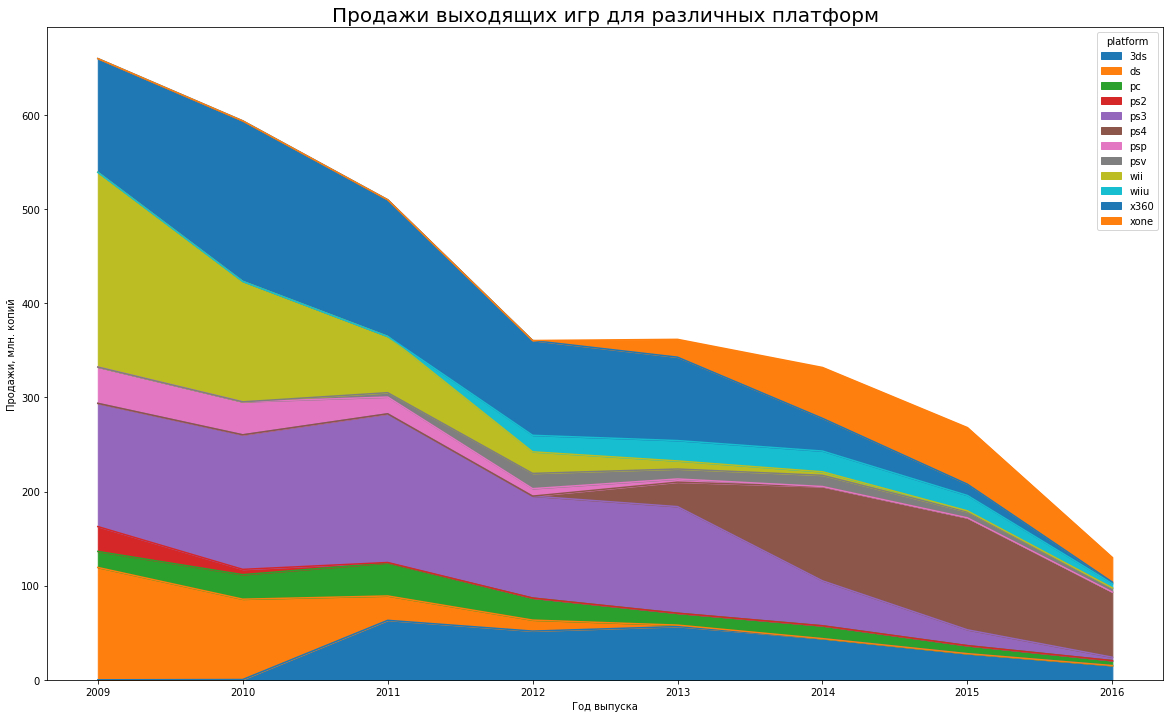

In [94]:
sales_by_platform_by_year_since2009 = df_for_plot.pivot_table(
    index = 'year_of_release',  columns = 'platform', values = 'total_sales', aggfunc = 'sum')
ax = sales_by_platform_by_year_since2009.plot(figsize = (20,12), legend = True, kind = 'bar', stacked = True)
bx = sales_by_platform_by_year_since2009.plot(figsize = (20,12), legend = True, kind = 'area')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Продажи, млн. копий')
ax.set_title('Продажи выходящих игр для различных платформ',fontsize=20)
bx.set_xlabel('Год выпуска')
bx.set_ylabel('Продажи, млн. копий')
bx.set_title('Продажи выходящих игр для различных платформ',fontsize=20)

In [95]:
sales_by_platform_by_year_since2009

platform           3ds      ds     pc    ps2     ps3     ps4    psp    psv  \
year_of_release                                                              
2009               NaN  119.36  17.05  26.40  130.93     NaN  38.58    NaN   
2010              0.30   85.35  26.06   5.64  142.96     NaN  35.04    NaN   
2011             63.20   25.88  35.12   0.45  157.98     NaN  17.82   4.63   
2012             51.76   11.67  23.45    NaN  108.28     NaN   7.95  16.19   
2013             56.57    1.54  12.66    NaN  113.25   25.99   3.38  10.59   
2014             43.76     NaN  13.63    NaN   47.76  100.00   0.24  11.90   
2015             27.78     NaN   8.52    NaN   16.82  118.90   0.12   6.25   
2016             15.14     NaN   5.25    NaN    3.60   69.25    NaN   4.25   

platform            wii   wiiu    x360   xone  
year_of_release                                
2009             206.97    NaN  120.82    NaN  
2010             128.01    NaN  170.55    NaN  
2011              59.79    NaN  145.23    NaN  
2012              22.94  17.56  100.72    NaN  
2013               8.59  21.65   88.58  18.96  
2014               3.75  22.03   34.74  54.07  
2015               1.14  16.35   11.96  60.14  
2016               0.18   4.60    1.52  26.15

count    12.000000
mean     10.333333
std       5.989890
min       4.000000
25%       5.750000
50%      11.000000
75%      12.000000
max      26.000000
Name: years_of_living, dtype: float64

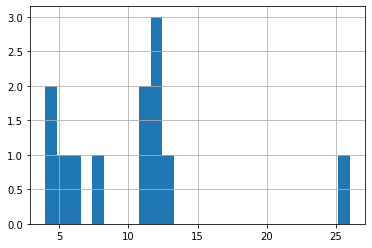

In [96]:
games_by_year_by_platform2 = df.query('platform.isin(@platform_scince_2009_list)').pivot_table(
    index = 'platform',  columns = 'year_of_release', values = 'name', aggfunc = 'count')
platform_count2 = games_by_year_by_platform2.pivot_table(
    index = 'platform',  aggfunc = 'count')
platform_count2['years_of_living'] = platform_count2.sum(axis = 1)
platform_years_of_live2 = platform_count2['years_of_living']
platform_years_of_live2.hist(bins = 26)
platform_years_of_live2.describe()

- Как мы уже смотрели ранее, в среднем игры для платформы выпускаются в течении 7 лет, для 75% платформ – меньше 11 лет; 
- Рекордсмен – персональный компьютер. Игры для него выпускаются уже 26 лет.
- Однако стоит отметить, что популярные сейчас платформы в среднем живут уже 11 лет. Очевидно, производителистараются продлить популярность и срок жизни своих устройств.


### Актуальные платформы

- Выберем актуальный период для прогнозирования на 2017 год;
- Найдем платформы, которые лидируют по продажам и выявим тренды;
- Выберем несколько потенциально прибыльных платформ.

- Актуальный период - с 2013 года. Современные платформы живут по 11 лет и больше, однако новые платформы быстро набирают популярность. Так же высокая волатильность показателей говорит о том, что брать период более 3-4 лет может вывести в топ платформы, популярность которых уже быстро падает.  
    

Так же стоит помнить, что данные за 2016 год могут быть не полные. Итого будем использовать последние 7 лет.

    
По состаянию на 2016 год актуальными остаются только 9 платформ. Судя по тому, что согласно данным за 2016 год абсолютно все платформы начали падать в продажах, вероятнее всего даные не полные. В связи с чем ориентироваться нужно на рост с 2013 на 2015 год.

Таким образом перспективными платформами с растущими продажами является PS4, XONE. Так же уже 26 лет подряд актуальным остается платформа PC. Так же пока ещё актуальным остается платформа 3ds, на данный момент она на третьем месте по продажам, но платформе уже 7 лет, а значит продажи будут только падать. 
Все ещё актуальными остаются платфрмы PS3 и X360, но они сильно падают в продажах. Платформы PSV и Wii уже практически не приносят продаж.

Итого:
    
    Перспективные: PS4, XONE
    Актуальные: 3DS, PS3, X360, PC, Wiiu
    Не перспективные: PSV, Wii.
    Прочие платформы не приносят продаж.
    




### Ящик с усами


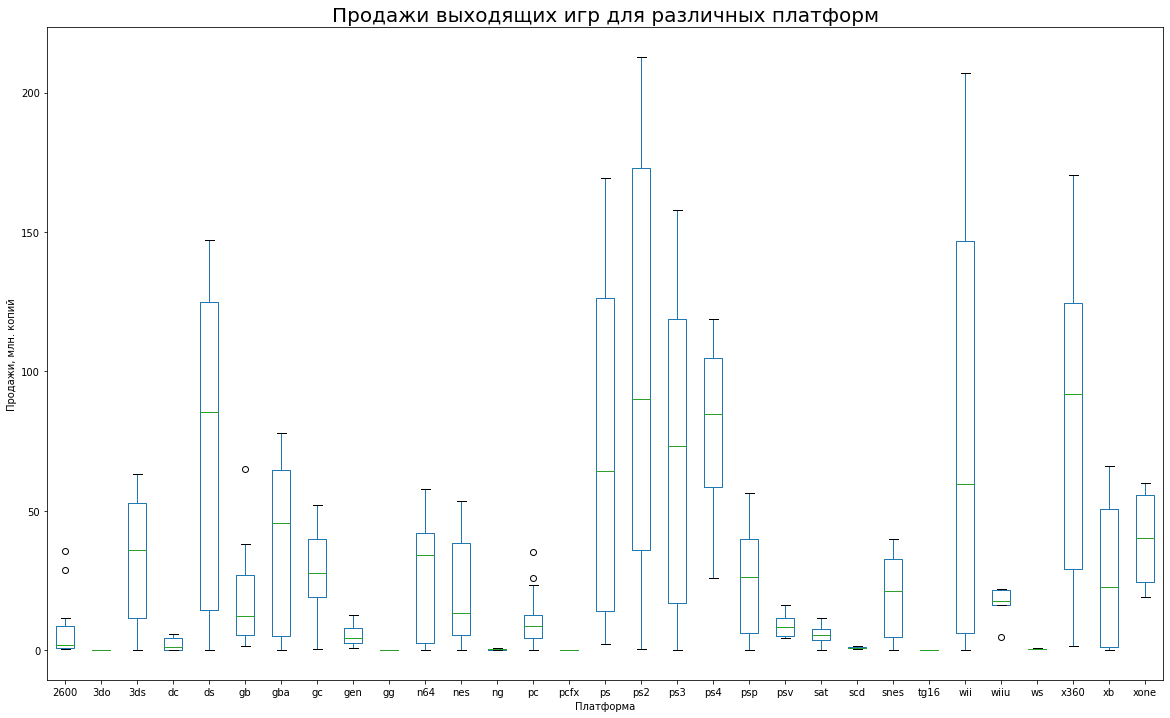

In [103]:
ax = sales_by_platform_by_year.plot(figsize = (20,12), legend = True, kind = 'box')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи, млн. копий')
ax.set_title('Продажи выходящих игр для различных платформ',fontsize=20);

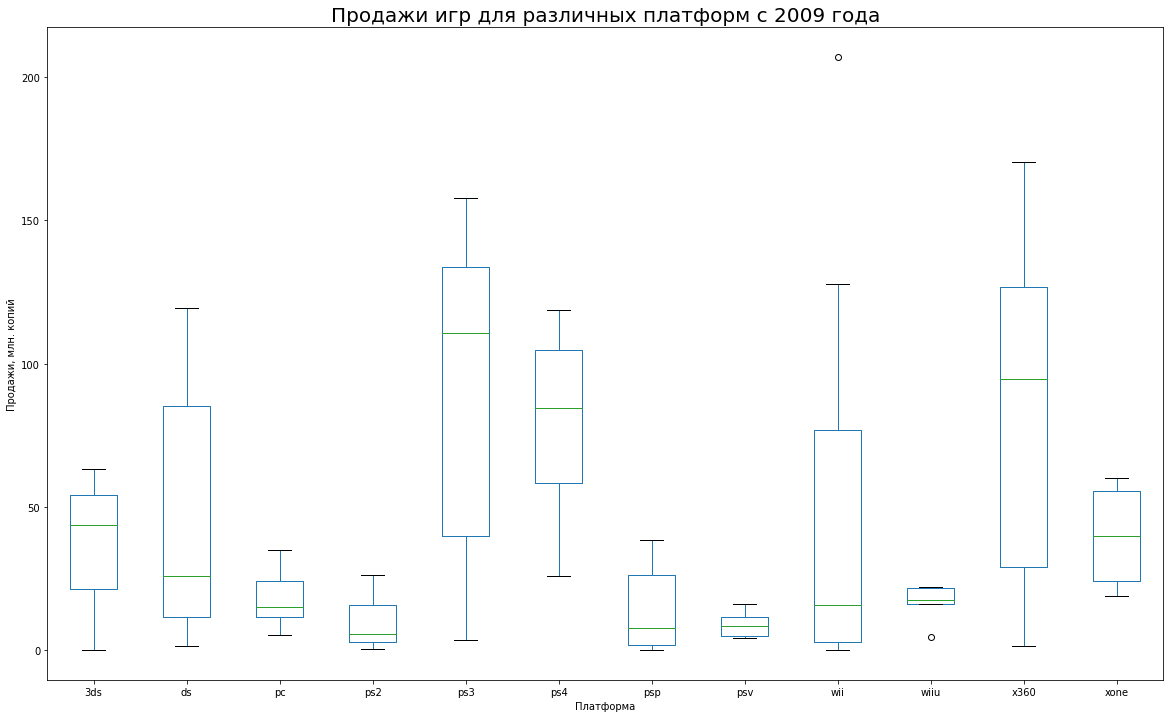

In [104]:
ax = sales_by_platform_by_year_since2009.plot(figsize = (20,12), legend = True, kind = 'box')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи, млн. копий')
ax.set_title('Продажи игр для различных платформ с 2009 года',fontsize=20);

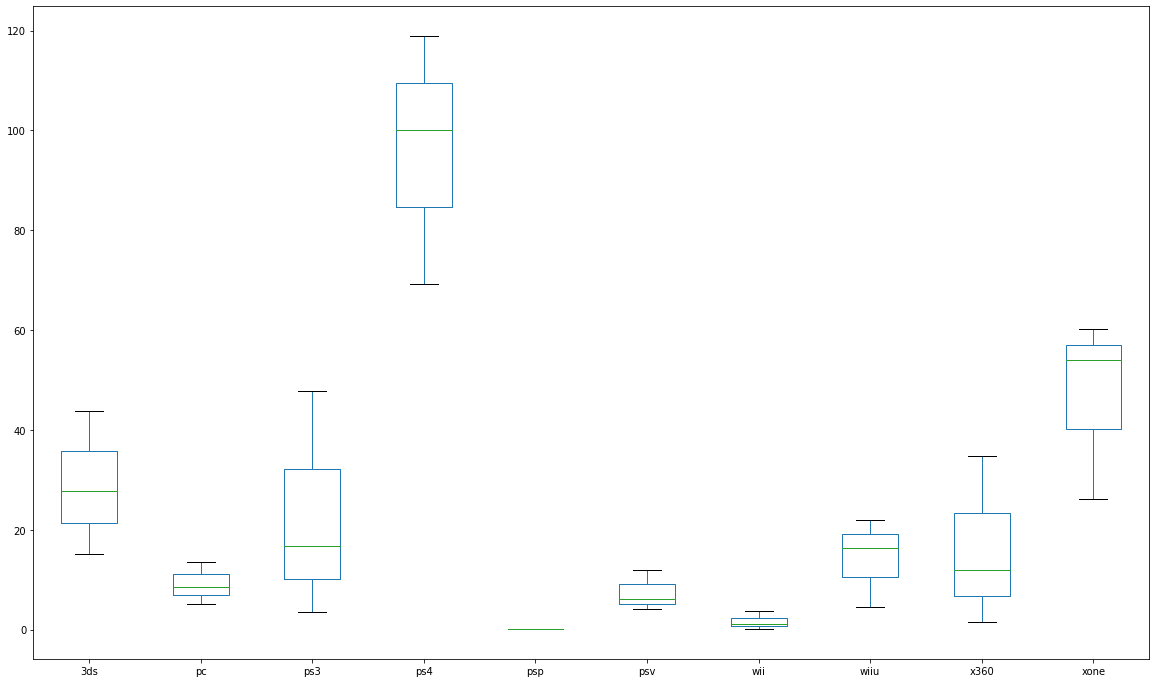

In [105]:
sales_by_platform_by_year_since2014 = df.query('year_of_release >2013').pivot_table(
    index = 'year_of_release',  columns = 'platform', values = 'total_sales', aggfunc = 'sum')
sales_by_platform_by_year_since2014.plot(figsize = (20,12), legend = True, kind = 'box')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи, млн. копий')
ax.set_title('Продажи игр для различных платформ с 2014 года',fontsize=20);

Из приведенных графиков видно, как с течением времени меняются перспективные платформы. При сравнении периодов с 2009 года и с 2014 мы видим, что продажи PS3 падают, а PS4 растут. То же самое происходит и с X360 и XONE.
    
Сравнив изменения на двух последних графиках становится понятным, что выводы, сделанные в предыдущий раз - верны.
    
    
        
    Перспективные: PS4, XONE
    Актуальные: 3DS, PS3, X360, PC, Wiiu
    Не перспективные: PSV, Wii.
    Прочие платформы не приносят продаж.
    
    
    


### Влияние отзывов на продажи

    Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [106]:
df_critics_score = df.query('critic_score.notna() and year_of_release >= 2013')
df_critics_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 16 to 16530
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             994 non-null    object 
 1   platform         994 non-null    object 
 2   year_of_release  994 non-null    int64  
 3   genre            994 non-null    object 
 4   na_sales         994 non-null    float64
 5   eu_sales         994 non-null    float64
 6   jp_sales         994 non-null    float64
 7   other_sales      994 non-null    float64
 8   critic_score     994 non-null    float64
 9   user_score       979 non-null    float64
 10  rating           957 non-null    object 
 11  total_sales      994 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 101.0+ KB


In [101]:
df_user_score = df.query('user_score.notna() and year_of_release >= 2013')
df_user_score['user_score'] = df_user_score['user_score'].astype('float') 
df_user_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 16 to 16530
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1195 non-null   object 
 1   platform         1195 non-null   object 
 2   year_of_release  1195 non-null   int64  
 3   genre            1195 non-null   object 
 4   na_sales         1195 non-null   float64
 5   eu_sales         1195 non-null   float64
 6   jp_sales         1195 non-null   float64
 7   other_sales      1195 non-null   float64
 8   critic_score     979 non-null    float64
 9   user_score       1195 non-null   float64
 10  rating           1153 non-null   object 
 11  total_sales      1195 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 121.4+ KB


/tmp/ipykernel_82/519611205.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



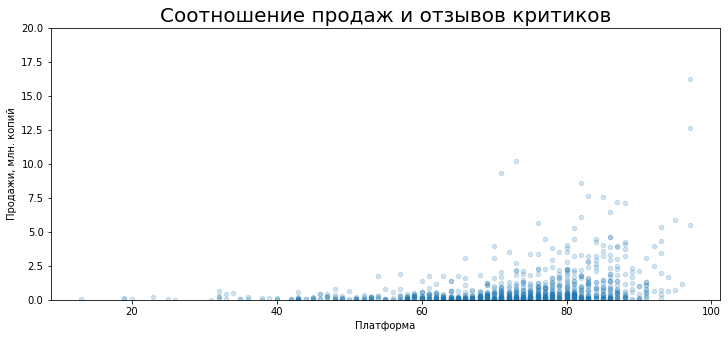

In [110]:
ax = df_critics_score.plot(x='critic_score', y='total_sales', kind='scatter', ylim = (0,20),alpha=0.2, figsize = (12,5)) 
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи, млн. копий')
ax.set_title('Соотношение продаж и отзывов критиков',fontsize=20);

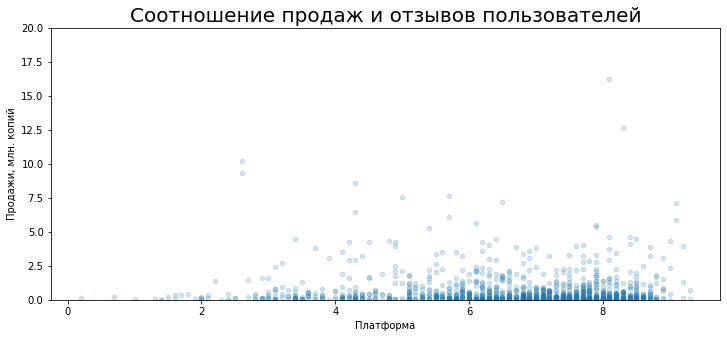

In [112]:
ax = df_user_score.plot(x='user_score', y='total_sales', kind='scatter', ylim = (0,20),alpha=0.2, figsize = (12,5)) 
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи, млн. копий')
ax.set_title('Соотношение продаж и отзывов пользователей',fontsize=20);

Коэффициент кореляции между оценкими критиков и продажами для PS4 для средне и высоко-оцененных игр 0.45


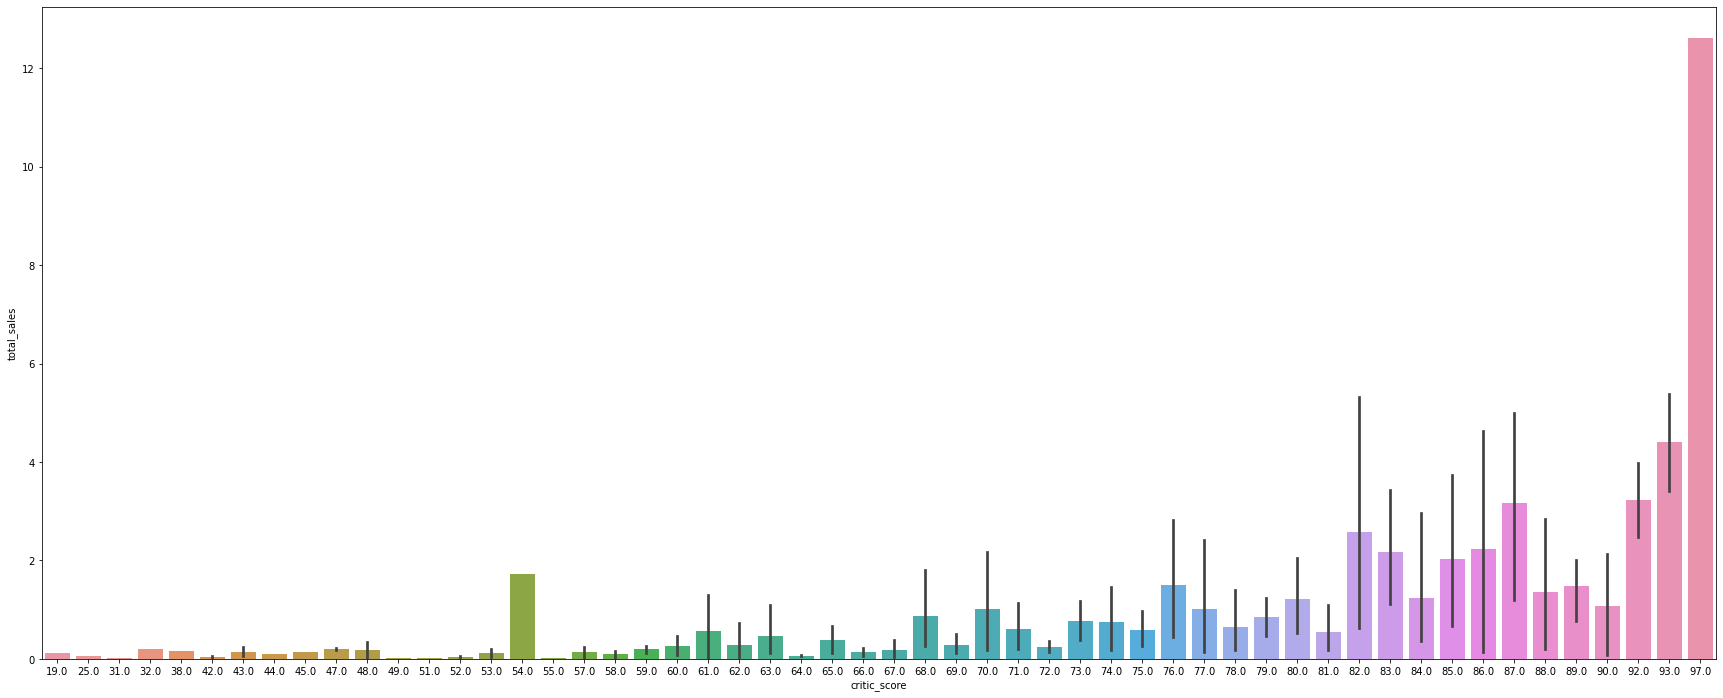

In [117]:
plt.figure(figsize=(30,12))

sb.barplot(x = df_critics_score.query('platform == "ps4"')['critic_score'], 
           y = df_critics_score.query('platform == "ps4"')['total_sales'],)

temp = df_critics_score.query('platform == "ps4" and 65 <= critic_score <= 97')['critic_score'].corr(df_critics_score.query('platform == "ps4"')['total_sales'])
print(f'Коэффициент кореляции между оценкими критиков и продажами для PS4 для средне и высоко-оцененных игр {temp:.2}')

- видно, что в среднем игры с более высокой оценкой от критиков лучше продаются. Если разделить продажи на 2 категории "низкие" и "высокие", то там кореляция будет ощутимо выше.

In [118]:
df_critics_score.query('critic_score == 54 and platform == "ps4"')

name platform  year_of_release     genre  na_sales  eu_sales  jp_sales  \
1020  knack      ps4             2013  platform      0.43      0.68      0.42   

      other_sales  critic_score  user_score rating  total_sales  
1020          0.2          54.0         6.5   e10+         1.73

Насколько я понимаю, данная игра была чуть ли не единственной новой, доступной для покупки с момента выхода консоли PS4. Поэтому несмотря на низкую оценку критиков, у игры хорошие продажи, поскольку отсутствовала конкуренция.

- посмотрим так же "казуальную" платформу wiiu - единственную из изученных платформ, где кореляция оценок пользователей с продажами выше, чем у критиков.

Коэффициент кореляции между оценкими пользователей и продажами для wiiu для средне и высоко-оцененных игр 0.57


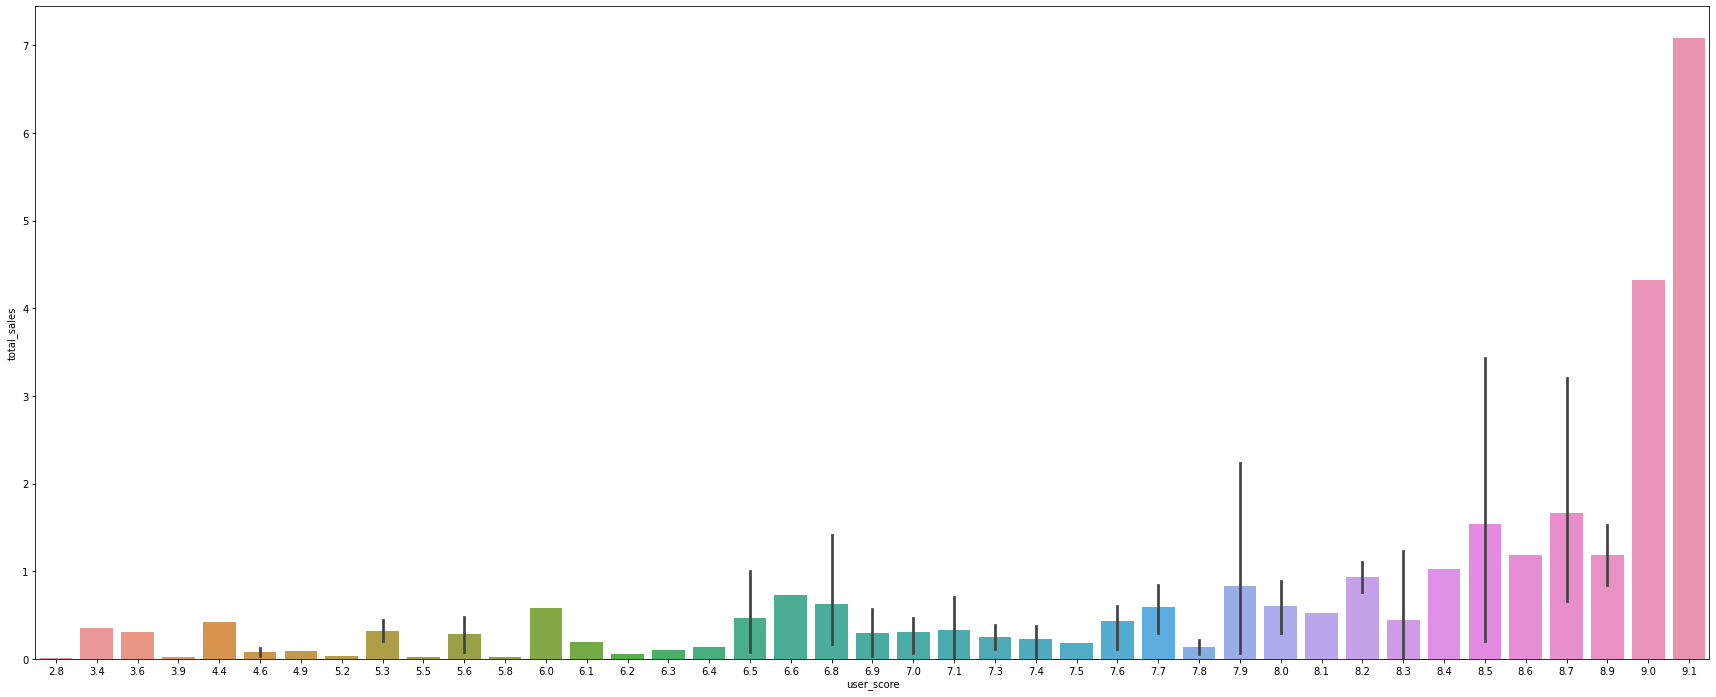

In [119]:
plt.figure(figsize=(30,12))

sb.barplot(x = df_user_score.query('platform == "wiiu"')['user_score'], 
           y = df_user_score.query('platform == "wiiu"')['total_sales'],)

temp = df_user_score.query('platform == "wiiu" and 7 <= user_score <= 10')['user_score'].corr(df_user_score.query('platform == "wiiu"')['total_sales'])
print(f'Коэффициент кореляции между оценкими пользователей и продажами для wiiu для средне и высоко-оцененных игр {temp:.2}')

### Проверка гипотез о влиянии оценок критиков и пользователей

- Нулевой гипотезой будет, что продажи игр с высокой оценкой критиков (более top_score), продаются так же, как и все остальные;
- Альтернативной гипотезой является то, что продажи игр с высокой оценкой критиков больше среднего;
- Возьмем стандартную вероятность 5%;
- В данном случае это односторонний тест между средним нашей совокупностью и выборкой, потому используем scipy.stats.ttest_1samp();

In [120]:
top_score = 65 
alpha = 0.05 


sales_all_critics_scores_mean = df_critics_score['total_sales'].mean()
sales_big_critics_scores = df_critics_score[df_critics_score['critic_score'] >= top_score]['total_sales']

results = st.ttest_1samp(sales_big_critics_scores, sales_all_critics_scores_mean)

print('P-value:', results.pvalue)

if (results.pvalue / 2 < alpha) and (sales_big_critics_scores.mean() > sales_all_critics_scores_mean):
    print("Отвергаем нулевую гипотезу, игры с более высокой оценкой продаются лучше")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print(f'Средние продажи игр у которых есть оценки критиков -  {(sales_all_critics_scores_mean):.2f} миллионов копий')

print(f'Средние продажи игр у которых оценки критиков выше {top_score} баллов - {sales_big_critics_scores.mean():.2f} миллионов копий')


P-value: 0.012054902863588974
Отвергаем нулевую гипотезу, игры с более высокой оценкой продаются лучше
Средние продажи игр у которых есть оценки критиков -  0.72 миллионов копий
Средние продажи игр у которых оценки критиков выше 65 баллов - 0.87 миллионов копий


- Нулевой гипотезой будет, что продажи игр с высокой оценкой пользователей (более top_score), продаются так же, как и все остальные;
- Альтернативной гипотезой является то, что продажи игр с высокой оценкой пользователей больше;
- Возьмем стандартную вероятность 5%;
- В данном случае это односторонний тест между средним нашей совокупностью и выборкой, потому используем scipy.stats.ttest_1samp();

In [126]:
top_score = 8.7 
alpha = 0.05 

sales_all_user_scores_mean = df_user_score['total_sales'].mean()
sales_big_user_scores = df_user_score[df_user_score['user_score'] >= top_score]['total_sales']

results = st.ttest_1samp(sales_big_user_scores, sales_all_user_scores_mean)

print('P-value:', results.pvalue)

if (results.pvalue / 2 < alpha) and (sales_big_user_scores.mean() > sales_all_user_scores_mean):
    print("Отвергаем нулевую гипотезу, игры с более высокой оценкой продаются лучше")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print(f'Средние продажи игр у которых есть оценки пользователей -  {(sales_all_user_scores_mean):.2f} миллионов копий')

print(f'Средние продажи игр у которых оценки пользователей выше {top_score} баллов - {sales_big_user_scores.mean():.2f} миллионов копий')

P-value: 0.05087341975943471
Отвергаем нулевую гипотезу, игры с более высокой оценкой продаются лучше
Средние продажи игр у которых есть оценки пользователей -  0.68 миллионов копий
Средние продажи игр у которых оценки пользователей выше 8.7 баллов - 1.19 миллионов копий


### Подытог

- Достаточно низкие линейные кореляции между оценками и продажами замечены на всех платформах. Однако, стоит отметить, что корреляци значительно усиливаются, если рассматривать их в интервале "низких" (до 50) и "высоких" (выше 65).
    
- Так же стоит отметить, что для большинства платформ, оценки пользователей дают значительно худшую, а иногда и отрицательную кореляцию. Исключение состваляют "казуальные" платформы, в частности WiiU. У них кореляция между оценками пользователей и продажами выше, чем у критиков.
    
- Стоит все же отметить, что игры с более высокими оценками продаются лучше. Точкой отсечения, после которой начинается улучшение продаж для оценки критиков является 65 баллов, для пользователей - 8,7 баллов.
    
- В общем и целом, оценки нужно учитывать категориально - высокие или низкие.



### Распределение игр по жанрам.

    Посмотрите на общее распределение игр по жанрам.

In [127]:
sales_by_genre = df.query('year_of_release >= 2013').pivot_table(
    index = 'genre', values = 'total_sales', aggfunc = ['sum', 'count', 'mean', 'median'])
sales_by_genre = sales_by_genre.reset_index()
sales_by_genre
sales_by_genre.sort_values(by = ('mean', 'total_sales'), ascending = False)

genre         sum       count        mean      median
                 total_sales total_sales total_sales total_sales
8        shooter      232.98         187    1.245882       0.450
10        sports      150.65         214    0.703972       0.240
4       platform       42.63          74    0.576081       0.225
7   role-playing      145.89         292    0.499623       0.125
6         racing       39.89          85    0.469294       0.120
2       fighting       35.31          80    0.441375       0.125
0         action      322.50         769    0.419376       0.110
3           misc       63.06         156    0.404231       0.105
9     simulation       21.76          62    0.350968       0.100
5         puzzle        3.17          17    0.186471       0.060
11      strategy       10.08          56    0.180000       0.080
1      adventure       23.64         245    0.096490       0.030

- Больше всего продаются игры жара "action", на втором месте "shooter". При этом общее количество игр самое большое у action и role-playing. Меньше всего продаются puzzle и strategy, средние доходы игр в этом жанре так же минимальные.
    
- Самые высокие средние доходы в играх жанра shooter и sports. На третьем месте - platform.

In [128]:
sales_by_rating = df.query('year_of_release >= 2013').pivot_table(
    index = 'rating', values = 'total_sales', aggfunc = ['sum', 'count', 'mean', 'median'])
sales_by_rating

sum       count        mean      median
       total_sales total_sales total_sales total_sales
rating                                                
e           200.16         302    0.662781       0.175
e10+        115.39         252    0.457897       0.275
m           372.31         372    1.000833       0.340
t           126.62         333    0.380240       0.150


- Больше всего производится игр с рейтингом E, в среднем лучше всего продаются игры с рейтингом M.
    
- Хуже всего продаются игры с рейтингом E10+.


## Портрет пользователей по регионам

Определим "портрет" среднего для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). 
 - Самые популярные жанры (топ-5). 
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?


- Заполним отсутствующий рейтинг игры значением "not_rated". Надо отметить, что эта ассоциация выставляет рейтинг для цензурирования игр в США и Канаде, поэтому игры, не расчиатнные на продажи в этих регионх, часто не подают заявки для присвоения рейтинга. 
- Так же, ранее рейтинги были нужны для размещения в крупных торговых сетях. Игры же без этого рейтинга можно было продавать только в специализированных магазинах, а сейчас, при переходе покупок игр в онлайн магазины, эта проблема стоит не так остро. Кроме того, существуют рейтинговые агенства других экономических зон, которые могут защитываться игровыми площадками для размещения. Поэтому отсутствие рейтинга никак в целом игру не характеризует.

In [129]:
df['rating'] = df['rating'].fillna(value = 'not_rated')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16553 entries, 0 to 16552
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16553 non-null  object 
 1   platform         16553 non-null  object 
 2   year_of_release  16553 non-null  int64  
 3   genre            16553 non-null  object 
 4   na_sales         16553 non-null  float64
 5   eu_sales         16553 non-null  float64
 6   jp_sales         16553 non-null  float64
 7   other_sales      16553 non-null  float64
 8   critic_score     8071 non-null   float64
 9   user_score       7534 non-null   float64
 10  rating           16553 non-null  object 
 11  total_sales      16553 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


- Как упоминалось ранее - Актуальный портрет пользователя можно учесть только взяв небольшой период -  последние четыре года - 2013, 2014, 2015 и часть 2016

In [137]:
print('Регион NA\n')
na_sales_top_platform = df.query('year_of_release >= 2013').pivot_table(
    index = 'platform', values = 'na_sales', aggfunc = ['sum', 'count']).sort_values(by = ('sum', 'na_sales'), ascending = False)
na_sales_top_platform.columns = ['na_sales_sum', 'games_count']
na_sales_top_platform['market_share'] = na_sales_top_platform['na_sales_sum']/(na_sales_top_platform['na_sales_sum'].sum())
print('\n\nПопулярные платформы')
display(na_sales_top_platform.head()) 

na_sales_top_genre = df.query('year_of_release >= 2013').pivot_table(
    index = 'genre', values = 'na_sales', aggfunc = ['sum', 'count']).sort_values(by = ('sum', 'na_sales'), ascending = False)
na_sales_top_genre.columns = ['na_sales_sum', 'games_count']
na_sales_top_genre['market_share'] = na_sales_top_genre['na_sales_sum']/(na_sales_top_genre['na_sales_sum'].sum())
print('\n\nПопулярные жанры')
display(na_sales_top_genre.head())

sales_in_na_by_rating = df.query('year_of_release >= 2013').pivot_table(
    index = 'rating', values = 'na_sales', aggfunc = ['sum', 'count']).sort_values(by = ('sum', 'na_sales'), ascending = False)
sales_in_na_by_rating.columns = ['na_sales_sum', 'games_count']
sales_in_na_by_rating['market_share'] = sales_in_na_by_rating['na_sales_sum']/(sales_in_na_by_rating['na_sales_sum'].sum())
print('\n\nРейтинги игр')
display(sales_in_na_by_rating)


Регион NA



Популярные платформы


na_sales_sum  games_count  market_share
platform                                         
ps4             108.74          392      0.248384
xone             93.12          247      0.212705
x360             81.66          186      0.186528
ps3              63.50          345      0.145047
3ds              38.20          303      0.087256



Популярные жанры


na_sales_sum  games_count  market_share
genre                                                
action              126.13          769      0.288106
shooter             109.74          187      0.250668
sports               65.27          214      0.149090
role-playing         46.40          292      0.105987
misc                 27.49          156      0.062793



Рейтинги игр


na_sales_sum  games_count  market_share
rating                                            
m                165.29          372      0.377555
not_rated         89.42          978      0.204253
e                 79.05          302      0.180566
e10+              54.24          252      0.123895
t                 49.79          333      0.113730

In [139]:
print('Регион EU\n')
eu_sales_top_platform = df.query('year_of_release >= 2013').pivot_table(
    index = 'platform', values = 'eu_sales', aggfunc = ['sum', 'count']).sort_values(by = ('sum', 'eu_sales'), ascending = False)
eu_sales_top_platform.columns = ['eu_sales_sum', 'games_count']
eu_sales_top_platform['market_share'] = eu_sales_top_platform['eu_sales_sum']/(eu_sales_top_platform['eu_sales_sum'].sum())
print('\n\nПопулярные платформы')
display(eu_sales_top_platform.head()) 

eu_sales_top_genre = df.query('year_of_release >= 2013').pivot_table(
    index = 'genre', values = 'eu_sales', aggfunc = ['sum', 'count']).sort_values(by = ('sum', 'eu_sales'), ascending = False)
eu_sales_top_genre.columns = ['eu_sales_sum', 'games_count']
eu_sales_top_genre['market_share'] = eu_sales_top_genre['eu_sales_sum']/(eu_sales_top_genre['eu_sales_sum'].sum())
print('\n\nПопулярные жанры')
display(eu_sales_top_genre.head())

sales_in_eu_by_rating = df.query('year_of_release >= 2013').pivot_table(
    index = 'rating', values = 'eu_sales', aggfunc = ['sum', 'count']).sort_values(by = ('sum', 'eu_sales'), ascending = False)
sales_in_eu_by_rating.columns = ['eu_sales_sum', 'games_count']
sales_in_eu_by_rating['market_share'] = sales_in_eu_by_rating['eu_sales_sum']/(sales_in_eu_by_rating['eu_sales_sum'].sum())
print('\n\nРейтинги игр')
display(sales_in_eu_by_rating)


Регион EU



Популярные платформы


eu_sales_sum  games_count  market_share
platform                                         
ps4             141.09          392      0.359273
ps3              67.81          345      0.172672
xone             51.59          247      0.131369
x360             42.52          186      0.108273
3ds              30.96          303      0.078837



Популярные жанры


eu_sales_sum  games_count  market_share
genre                                                
action              118.61          769      0.302029
shooter              87.86          187      0.223727
sports               60.52          214      0.154109
role-playing         36.97          292      0.094141
racing               20.19           85      0.051412



Рейтинги игр


eu_sales_sum  games_count  market_share
rating                                            
m                145.80          372      0.371266
e                 83.36          302      0.212269
not_rated         78.91          978      0.200937
e10+              42.69          252      0.108706
t                 41.95          333      0.106822

In [140]:
print('Регион JP\n')
jp_sales_top_platform = df.query('year_of_release >= 2013').pivot_table(
    index = 'platform', values = 'jp_sales', aggfunc = ['sum', 'count']).sort_values(by = ('sum', 'jp_sales'), ascending = False)
jp_sales_top_platform.columns = ['jp_sales_sum', 'games_count']
jp_sales_top_platform['market_share'] = jp_sales_top_platform['jp_sales_sum']/(jp_sales_top_platform['jp_sales_sum'].sum())
print('\n\nПопулярные платформы')
display(jp_sales_top_platform.head()) 

jp_sales_top_genre = df.query('year_of_release >= 2013').pivot_table(
    index = 'genre', values = 'jp_sales', aggfunc = ['sum', 'count']).sort_values(by = ('sum', 'jp_sales'), ascending = False)
jp_sales_top_genre.columns = ['jp_sales_sum', 'games_count']
jp_sales_top_genre['market_share'] = jp_sales_top_genre['jp_sales_sum']/(jp_sales_top_genre['jp_sales_sum'].sum())
print('\n\nПопулярные жанры')
display(jp_sales_top_genre.head())

sales_in_jp_by_rating = df.query('year_of_release >= 2013').pivot_table(
    index = 'rating', values = 'jp_sales', aggfunc = ['sum', 'count']).sort_values(by = ('sum', 'jp_sales'), ascending = False)
sales_in_jp_by_rating.columns = ['jp_sales_sum', 'games_count']
sales_in_jp_by_rating['market_share'] = sales_in_jp_by_rating['jp_sales_sum']/(sales_in_jp_by_rating['jp_sales_sum'].sum())
print('\n\nРейтинги игр')
display(sales_in_jp_by_rating)

Регион JP



Популярные платформы


jp_sales_sum  games_count  market_share
platform                                         
3ds              67.81          303      0.480854
ps3              23.35          345      0.165579
psv              18.59          358      0.131825
ps4              15.96          392      0.113175
wiiu             10.88          115      0.077152



Популярные жанры


jp_sales_sum  games_count  market_share
genre                                                
role-playing         51.04          292      0.361934
action               40.49          769      0.287122
misc                  9.44          156      0.066941
fighting              7.65           80      0.054248
shooter               6.61          187      0.046873



Рейтинги игр


jp_sales_sum  games_count  market_share
rating                                            
not_rated         85.29          978      0.604808
t                 20.59          333      0.146008
e                 15.14          302      0.107361
m                 14.11          372      0.100057
e10+               5.89          252      0.041767

<b>
    Рынок NA с 2013 по 2016:
</b>

Самые популярные платформы в порядке убывания: PS4, XONE, X360, PS3, 3DS
    
Длоя ps4 - 25%, доля xone - 21%. Вместе консоли PS и XBOX занимают 80% рынка игр за период. Пятерку лидеров закрывает 3DS с долей 9%.
    
Лучше всего продаются action, shooter и sports с долями 29%, 25% и 15%, занимая суммарно почти 70% рынка. Замыкают пятерку лидеров role-playing и misc с долями 11 и 6 процентов соответственно.
    
Лучше всего продаются игры с рейтингом М (от 17 лет) - 37% и игры без рейтинга - 20%. Хуже всего продаются игры с рейтингом Т - 11%.
    
Вероятнее всего на рынке преобладает возрастная категория (от 18 и выше), которая не стесняется насилия и с удовольствием играет в игры, которые получают взрослый рейтинг или не хотят / не могут получить его.


<b>
    Рынок EU с 2013 по 2016:
</b>

Самые популярные платформы в порядке убывания: PS4, PS3, XONE, X360, 3DS
    
Длоя ps4 - 36%, доля ps3 - 17%. Вместе консоли PS3 и PS4 занимают 50% рынка игр за период. XONE и X360 всего 24% рынка. Пятерку лидеров закрывает 3DS с долей 8%.
    
Лучше всего продаются action, shooter и sports с долями 30%, 22% и 15%, занимая суммарно почти 67% рынка. Замыкают пятерку лидеров role-playing и racing с долями 9 и 5 процентов соответственно.
    
Лучше всего продаются игры с рейтингом М (от 17 лет) - 36% и Е (для всех) - 21%. На третьем месте игры без рейтинга - 20%. Хуже всего продаются игры с рейтингом Т - 10%.
    
Вероятнее всего на рынке преобладает возрастная категория (от 18 и выше), которой все равно на возрастной рейтинг. Однако, несмотря на схожесть рынков NA и EU, стоит отметить, что игры без рейтинга продаются чуть хуже. Стоит предположить, что на европейском рынке доля несовершеннолетних выше, чем на северо-американском.


<b>
     Рынок JP с 2013 по 2016:   
</b>

Самые популярные платформы в порядке убывания: 3DS, PS3, PSV, PS4, WiiU 
    
Длоя 3DS - 48%, доля ps3 - 16.5%, psv - 13%. Вместе мобильные консоли 3DS и psv занимают 61% рынка игр за период. PS3 и PS4 занимают всего 28% рынка. Пятерку лидеров закрывает WiiU с долей 8%. Консоли X360 и XONE абсолютно не популярны на рынке.
    
Лучше всего продаются role-playing и action с долями 36% и 29%, занимая суммарно почти 65% рынка. Замыкают пятерку лидеров misc, fighting и shooter с долями 7, 5 и 5 процентов соответственно.
    
Лучше всего продаются игры без рейтинга ESRB - 60% и T (для подростков) - 15%. Хуже всего продаются игры с рейтингом e10+ - 4%.
    
Вероятнее всего на рынке преобладает подростковая и детская аудитория, которая предпочитает мобильные платформы 3DS и PSV. Так же, стоит напомнить, что ESRB - рейтинговое агенсвто для США и Канады. Вероятно, огромная доля продаж - 60% - игр без рейтинга - это игры расчитанные на локальный японский рынок, которые не ведут продвижение на рынках Европы и Северной Америки. Отсюда же и такая низкая доля продаж с весьма специфическим рейтингом e10+ - вероятно, это игры расчитанные не на японский регион, соответственно и продажи их - минимальны




<b>В целом: </b>  

- рынки NA и EU очень схожи, но на американском рынке преобладают американские консоли, а на европейском - японские. 
- Объемы рынков NA и EU почти одинаковы, любимые жанры - action, shooter и sport.
    
- На японском же рынке практически отсутствуют иностранные консоли, преобладает подрастковая аудитория и мобильные (переносные) игровые платформы. Большая часть рынка - ролевые игры, их доля в четыре раза выше, чем на западных рынках. При этом доля спортивных игр несущественна. Так же стоит отметить, что японский рынок в 3 раза меньше, чем европейский или американский. Так же стоит отметить, что на рынке японии невысокие продажи для консоли ps4.


## Проверка гипотез

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [141]:
display(df_user_score[df_user_score['platform'] == 'xone' ]['user_score'].describe())
display(df_user_score[df_user_score['platform'] == 'pc' ]['user_score'].describe())

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

count    158.000000
mean       6.280380
std        1.735044
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

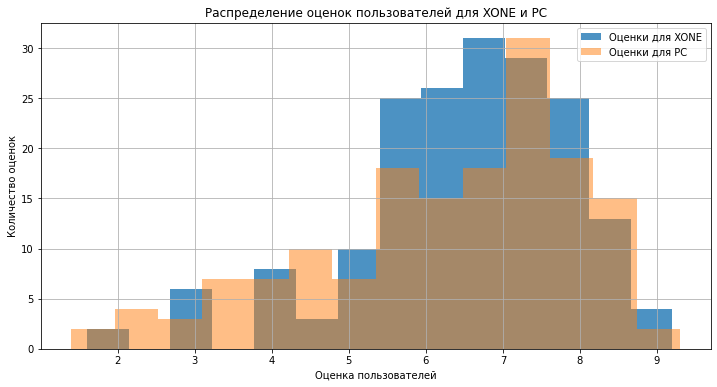

In [157]:
ax = df_user_score[df_user_score['platform'] == 'xone' ]['user_score'].hist(alpha = 0.8, bins = 14, legend = True, figsize = (12,6))
bx = df_user_score[df_user_score['platform'] == 'pc' ]['user_score'].hist(alpha = 0.5, bins = 14, legend = True)
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Количество оценок')
ax.set_title('Распределение оценок пользователей для XONE и PC')
ax.legend(['Оценки для XONE', 'Оценки для PC']);

- Нулевой гипотезой будет, что рейтинги одинаковые;
- Альтернативной гипотезой является, что они разные;
- Испотльзуем двусторонний Т-тест для проверки равенства средних из совокупностей с различной дисперсией.

In [156]:
alpha = 0.05 

results = st.ttest_ind(df_user_score[df_user_score['platform'] == 'xone' ]['user_score'], 
                       df_user_score[df_user_score['platform'] == 'pc' ]['user_score'],
                       equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.16174359801784316
Не получилось отвергнуть нулевую гипотезу


<b> Отвергнуть гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые нельзя </b>

- Проверим, что средние пользовательские рейтинги жанров Action и Sports разные.

In [127]:
display(df_user_score[df_user_score['genre'] == 'action']['user_score'].describe())
display(df_user_score[df_user_score['genre'] == 'sports']['user_score'].describe())

count    392.000000
mean       6.837500
std        1.329076
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

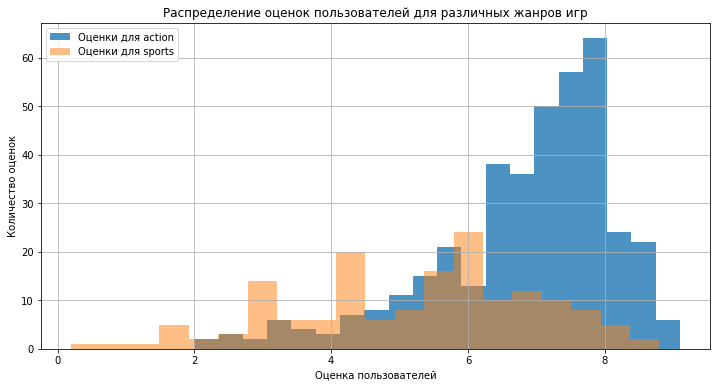

In [159]:
ax = df_user_score[df_user_score['genre'] == 'action']['user_score'].hist(alpha = 0.8, bins = 20, legend = True, figsize = (12,6))
bx = df_user_score[df_user_score['genre'] == 'sports']['user_score'].hist(alpha = 0.5, bins = 20, legend = True)
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Количество оценок')
ax.set_title('Распределение оценок пользователей для различных жанров игр')
ax.legend(['Оценки для action', 'Оценки для sports']);

- Нулевой гипотезой будет, что пользовательские оценки одинаковые;
- Альтернативной гипотезой является, что они разные;
- Испотльзуем двусторонний Т-тест для проверки равенства средних из совокупностей с различной дисперсией.

In [160]:
alpha = 0.05 

results = st.ttest_ind(df_user_score[df_user_score['genre'] == 'action']['user_score'], 
                       df_user_score[df_user_score['genre'] == 'sports']['user_score'],
                       equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 1.3883444596405356e-20
Отвергаем нулевую гипотезу


### Подытог
- Утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются нельзя.
    
- Гипотеза, что средние пользовательские рейтинги за интересующий период для жанров Action и Sports не отличаются - не подтвердилась, что неплохо илюстрирует гистограмма.

</div>

## Общий вывод

 - Провели подготовку данных для анализа, устранили пропуски там, где это возможно. Исходный набор данных сократился на 2%.
 - Выявили, что оценка пользователей "tbd" выставляется, если оценок слишком мало для релевантной пользовательской оценки.
 - Оценка продаж показала, что рынок игр для различных платформ уверенно рос до 2008 года, а после него начал снижаться. Вероятная причина - распространение смартфонов с большими дисплеями, на которые ушла часть играющей аудитории.
 - Самыми популярными платформами для игр являются стационарные консоли произовдителей Sony (playstation), Microsoft (X-серия) и Nintendo (Wii). Среди переносных игровых платформ доминирует Nintendo. Поколения платформ сменяют друг друга, постепенно цикл жизни поколений увеличивается, что, вероятно, связано с замедлением технологического развития.
 - Продолжительность жизни платформы постепенно увеличивается и на данный момент достигает 11 лет.
 - Платформа PC всегда является актуальной, но её продажи ощутимо ниже специальных игровых платформ.
 - Продажи слабо линейно корелируют с оценками пользователей, в несколько раз лучше - с оценками критиков. Однако, сама высокая оценка не гарантирует высокие продажи в связи с большой разницей в популярности различных игровых жанров. Так же стоит однозначно отметить - игры с высокими оценками от пользователей или критиков - продаются лучше. 
 - Самыми большими рынками являются европейский и северо-американский, они примерно равны по размеру. Японский рынок в три раза меньше.
 - Самыми популярными жанрами являются action и shooter, однако на японском рынке (котоырй в три раза меньше) лидируют role-playing.
 - Пользователи с северной америки предпочитают стационарные консоли Micrisoft, пользователи из европы - стационарные консоли Sony, пользователи из Японии - портативные консоли Nintendo.
 - Статистически, в европе и северной америке лучше продаются игры с рейтигом M и E, в Японии - Т.
    
    
 - Лучше всего продаются игры для консолей нового поколения от производителей Micrisoft, Sony и Nintendo. Лучшие жанры - action, shooter, sports. Для выявления трендов необходимо анализировать продажи последних 3-5 лет, поскольку тренды достаточно быстро меняются. При появлении нового поколения консолей, в течении двух лет продажи предыдущего поколения резко падают. Стабильно средне продаются игры для PC.